In [492]:
import featuretools as ft
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

# 1. Load data from CSV

In [493]:
df = pd.read_csv("./real_estate.csv")
df.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


# 2. Parse data into text

In [494]:
decimals = df["X1 transaction date"].values[0]
print(int(decimals // 1))
months = ["Jan ", "Feb ", "Mar ", "Apr ", "May ", "Jun ", "Jul ", "Aug ", "Sep ", "Oct ", "Nov ", "Dec "]
print(round((decimals % 1) * 12))
decimals = months[int(round((decimals % 1) * 12) - 1)] + str(int(decimals // 1))

decimals

2012
11.0


'Nov 2012'

In [495]:
def parse_decimal_to_mmyy(x):
    months = ["Jan ", "Feb ", "Mar ", "Apr ", "May ", "Jun ", "Jul ", "Aug ", "Sep ", "Oct ", "Nov ", "Dec "]
    x2 = months[int(round((x % 1) * 12) - 1)] + str(int(x // 1))
    return x2

df["X1b transaction date"] = df["X1 transaction date"].apply(parse_decimal_to_mmyy)
df.head(30)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,X1b transaction date
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,Nov 2012
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,Nov 2012
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,Jul 2013
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,Jun 2013
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,Oct 2012
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1,Aug 2012
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3,Aug 2012
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7,May 2013
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8,Jun 2013
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1,May 2013


# 3. Data Exploration

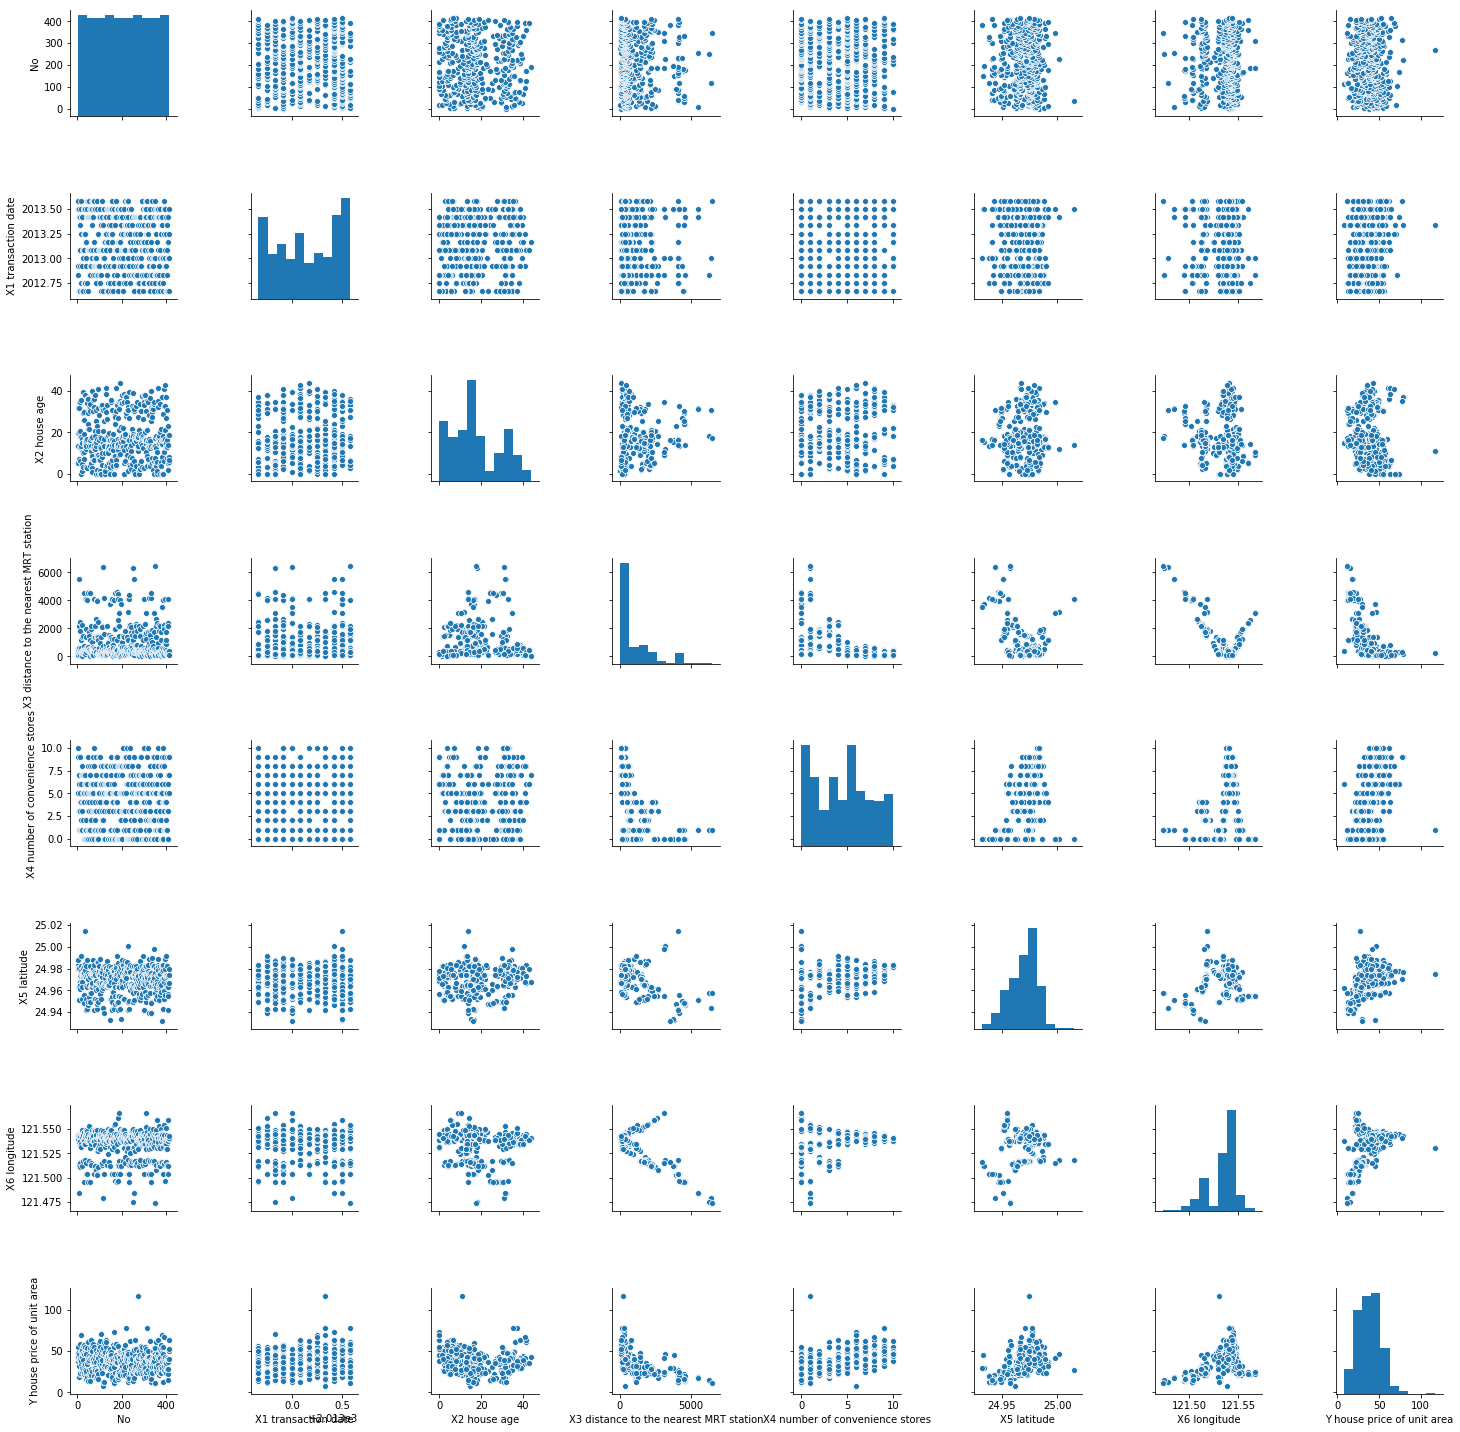

In [496]:
df = pd.read_csv("./real_estate.csv")
sns.pairplot(df)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


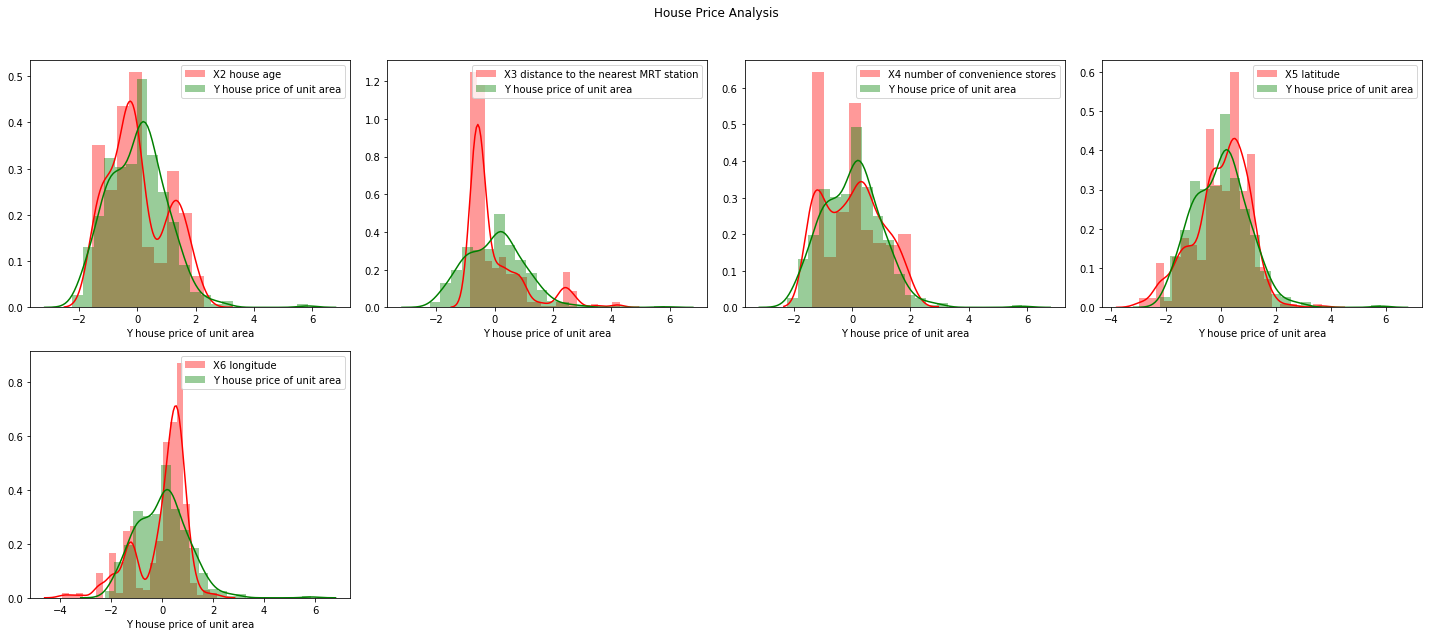

In [497]:
fig = plt.figure(figsize = (20,25))
j = 0

def z_score_normalize(arr):
    arr = (arr - arr.mean())/arr.std()
    return arr

target = df.columns[-1]
for i in df.columns[2:-1]:
    plt.subplot(6,4,j+1)
    j+=1 
    sns.distplot(z_score_normalize(df[i]), color="r", label=i)
    sns.distplot(z_score_normalize(df[target]), color="g", label=target)
    plt.legend(loc="best")
fig.suptitle("House Price Analysis")
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')
[(0, 4), (0, 5), (0, 6), (0, 7)]
[4, 5, 6]
Features Highly Correlated to Target 

X4 number of convenience stores
X5 latitude
X6 longitude
   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450         

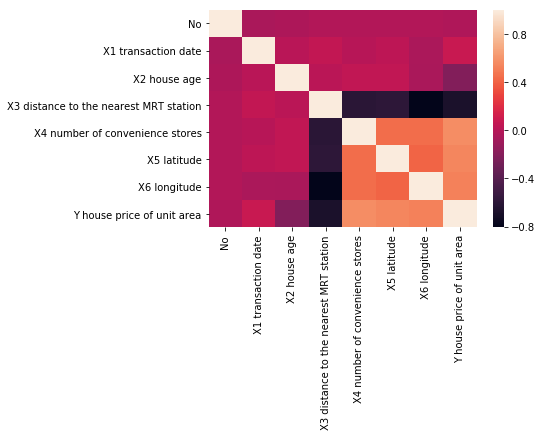

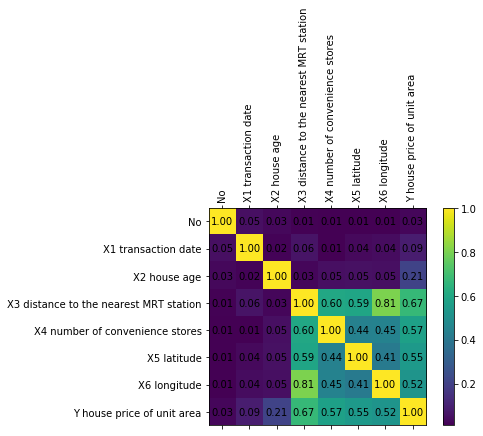

In [595]:
corr = df.corr()
print(corr.columns)

sns.heatmap(corr)

x_idx, y_idx = np.where(corr[-1:].values > 0.5)
coordinates = [coord for coord in list(zip(x_idx, y_idx))]
print(coordinates)
# corr_v = corr.values[coordinates]

correlations = list(map(lambda x:x[1], filter(lambda x:x[0] != x[1] and not len(df.columns)-1 in x, coordinates)))
print(correlations)
print("Features Highly Correlated to Target \n")
df2 = df
for c in correlations:
    print(df.columns[c])
    df2 = df.drop(labels=df.columns[c], axis=1)
    
print(df2.head())
            
fig, ax = plt.subplots()
im = ax.matshow(abs_corr_matrix)

for (i,j), z in np.ndenumerate(abs_corr_matrix):
    ax.text(j,i, "{:0.2f}".format(z), ha = 'center', va = 'center')
    ax.set_xticklabels(['No']+list(corr.columns), rotation='vertical')
    ax.set_yticklabels(['No']+list(corr.columns))
fig.colorbar(im)
plt.show()


Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


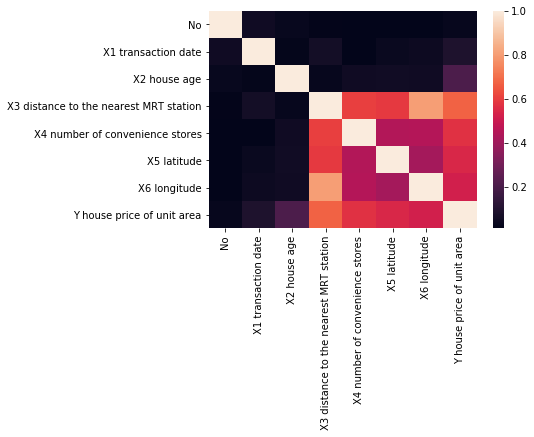

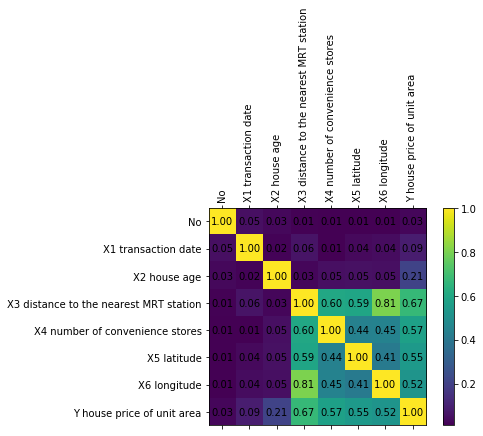

In [499]:
abs_corr_matrix = df.corr().apply(abs)
print(df.columns)

sns.heatmap(abs_corr_matrix)
fig, ax = plt.subplots()
im = ax.matshow(abs_corr_matrix)

for (i,j), z in np.ndenumerate(abs_corr_matrix):
    ax.text(j,i, "{:0.2f}".format(z), ha = 'center', va = 'center')
    ax.set_xticklabels(['No']+list(abs_corr_matrix.columns), rotation='vertical')
    ax.set_yticklabels(['No']+list(abs_corr_matrix.columns))
fig.colorbar(im)
plt.show()

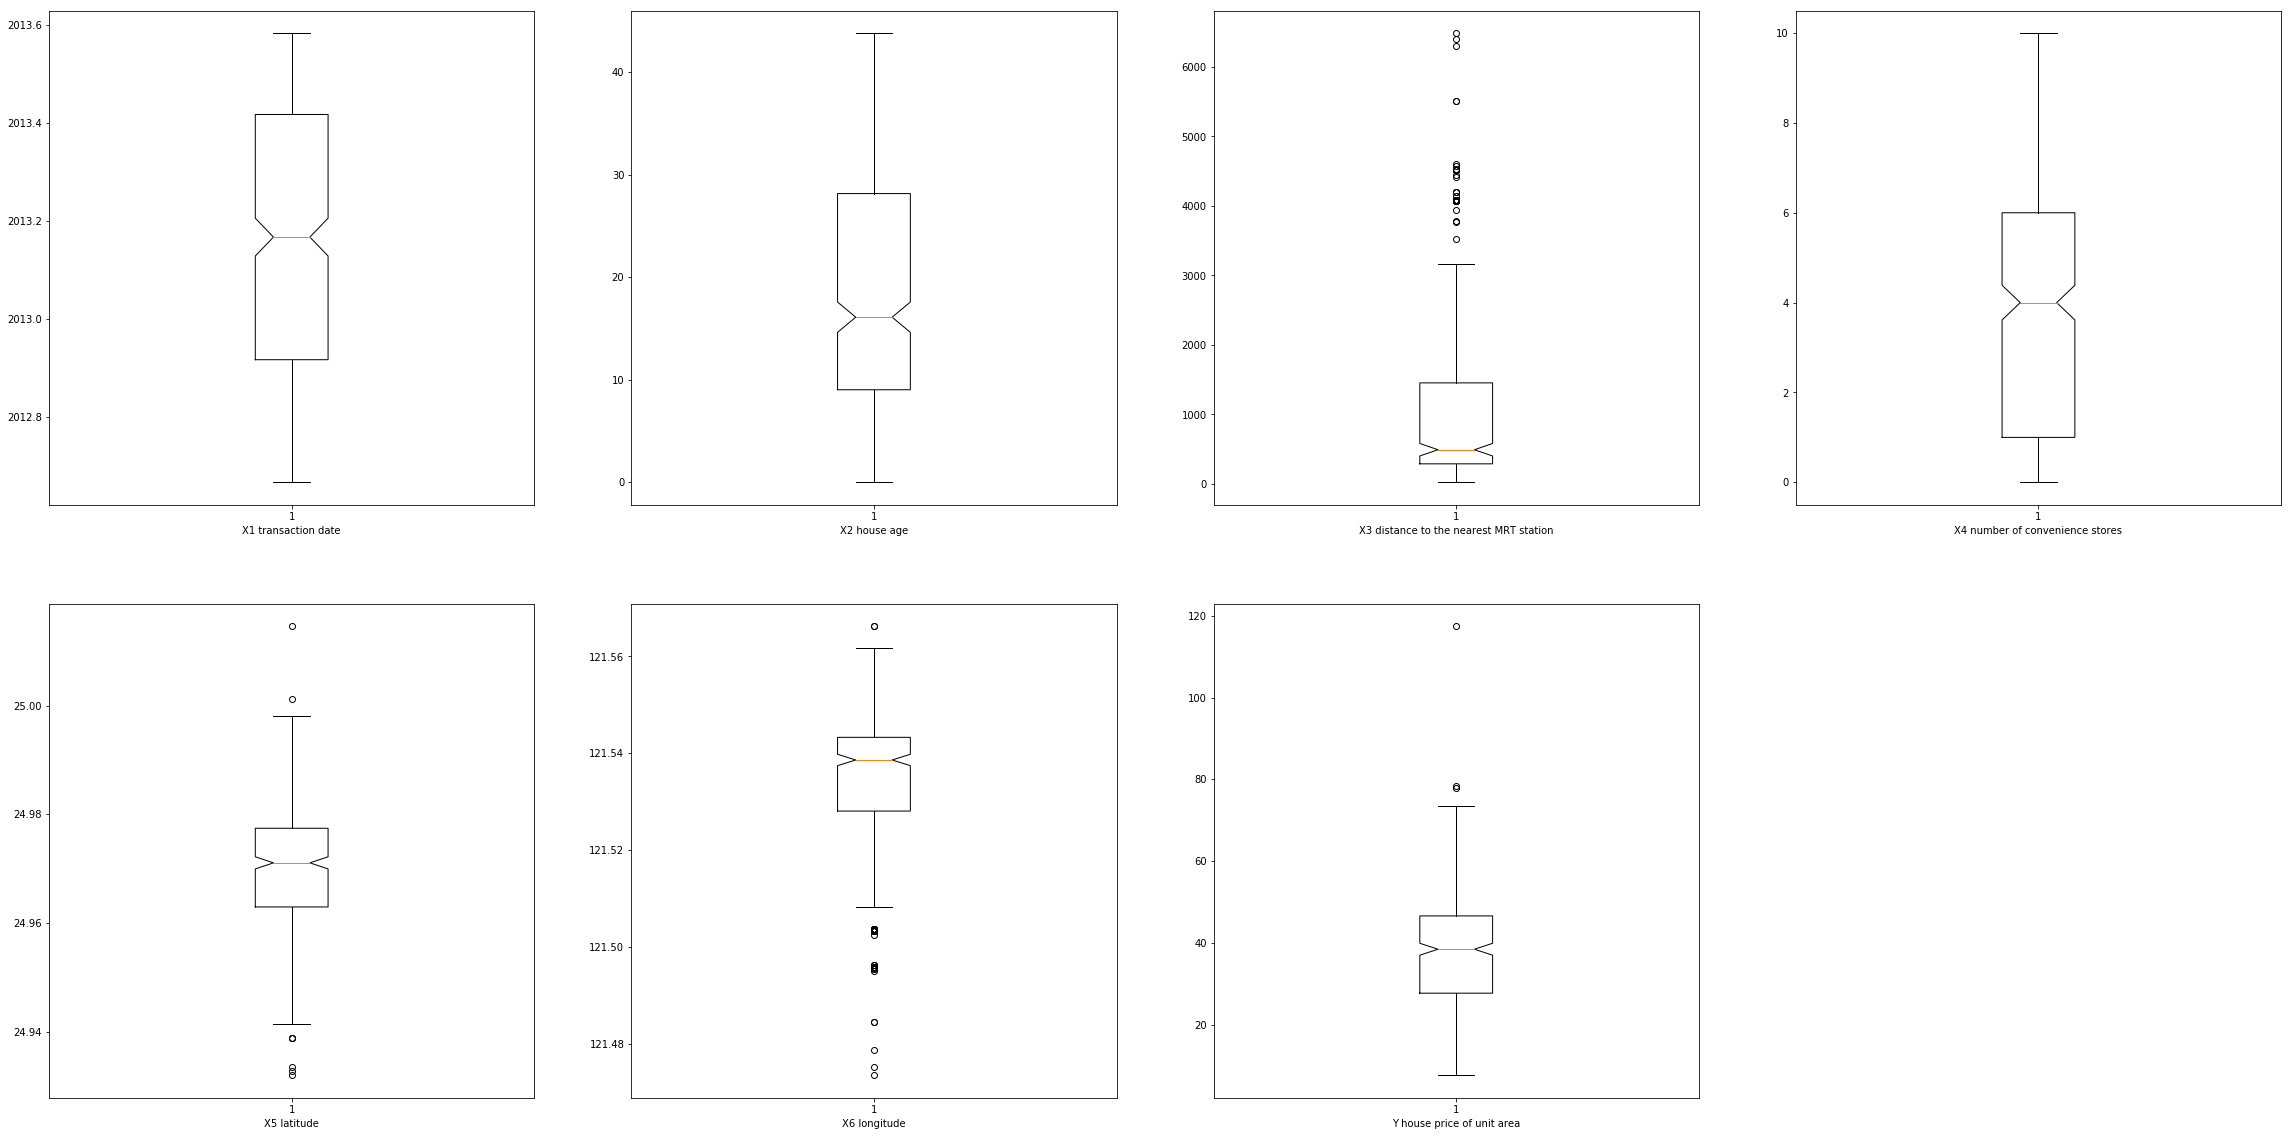

In [500]:
# Box plots
ncols = 4
nrows = 2
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(40,20))

for i, column in enumerate(df[df.columns[1:]].columns):
    ax[i//ncols, i%ncols].boxplot(df[column], notch=True)
    ax[i//ncols, i%ncols].set_xlabel(column)

ax[-1][-1].axis('off')    
plt.show()
    

Figure(2160x2160)


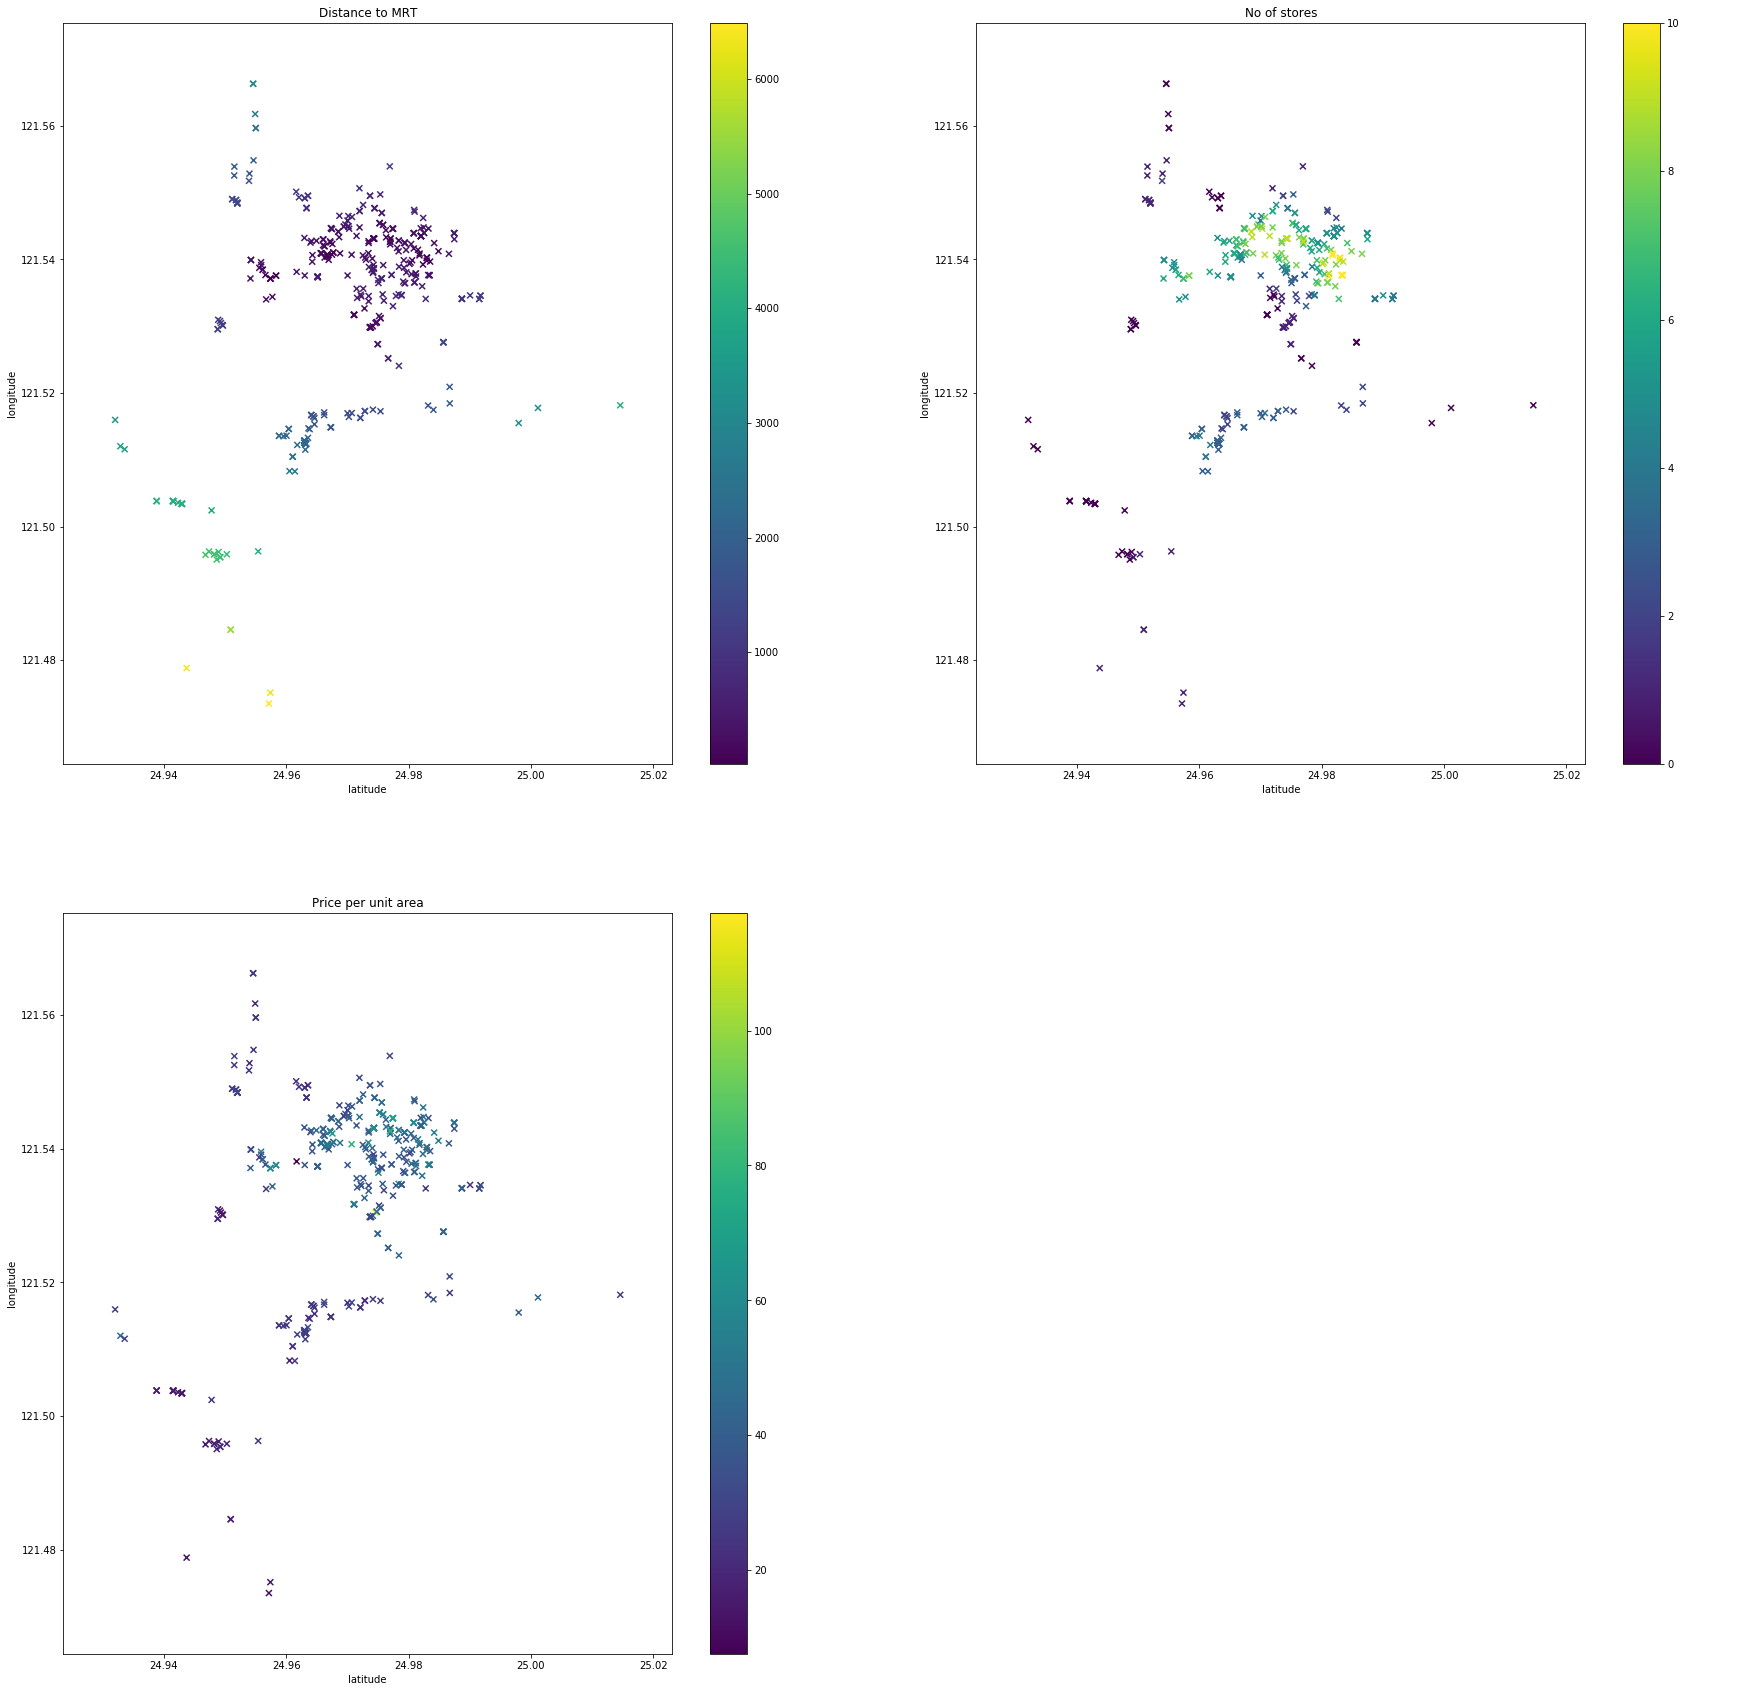

In [501]:
# Scatter plot

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(30,30))
print(fig)

im1 = ax[0][0].scatter(df["X5 latitude"], df["X6 longitude"], c=df["X3 distance to the nearest MRT station"], marker='x')
ax[0][0].set_xlabel("latitude")
ax[0][0].set_ylabel("longitude")
ax[0][0].set_title("Distance to MRT")
plt.colorbar(im1, ax=ax[0][0])

im2 = ax[0][1].scatter(df["X5 latitude"], df["X6 longitude"], c=df["X4 number of convenience stores"], marker='x')
ax[0][1].set_xlabel("latitude")
ax[0][1].set_ylabel("longitude")
ax[0][1].set_title("No of stores")
plt.colorbar(im2, ax=ax[0][1])

im3 = ax[1][0].scatter(df["X5 latitude"], df["X6 longitude"], c=df["Y house price of unit area"], marker='x')
ax[1][0].set_xlabel("latitude")
ax[1][0].set_ylabel("longitude")
ax[1][0].set_title("Price per unit area")

ax[1][1].axis('off')
plt.colorbar(im3, ax=ax[1][0])

plt.show()

## Feature Exploration


### 1.   Feature Correlation

There are no high correlations (>0.9) that need features to be removed based on collinearity.

House price displays negative correlation to the distance to the MRT station. The closer the unit is to this amenity, the higher its buying price. 

Some insights can also be gleamed from the scatter plots of the correlogram:
- The shorter a unit is positioned from the MRT, the higher the number of convenience stores within living area. This is evidence of nucleation of MRT stations and shops.
- The age of a house and transaction dates have close to little correlation to other independent variables


#### In conclusion,

there is likely only one MRT station

features with weak correlation (0.2 to 0.4) to house price are:
* house age (negative)

features with moderately strong correlation (0.4 to 0.6) to house price are:
* latitude
* longitude

features with strong correlation (0.6 to 0.8) to house price are:
* number of convenience stores
* distance to nearest MRT station (negative)

features with strong correlation in general:
* longitude and distance to MRT station (negative)
   * This means there is likely only one MRT station in the northeast of the covered region


# 4. Feature Engineering

## 4a. Adding Polynomial Features

In [590]:
from sklearn.preprocessing import PolynomialFeatures
feature_df = df[df.columns[:-1]]
target_df = df["Y house price of unit area"]

poly = PolynomialFeatures(3)
X = feature_df[feature_df.columns].values

X_poly = poly.fit_transform(X)
print(poly.get_feature_names())
old_features = feature_df.columns
feature_df = pd.DataFrame(X_poly, columns=poly.get_feature_names())
print(feature_df.head())

new_features =poly.get_feature_names()[1:len(old_features)]
print(new_features)
translation_table = {}
for f_old, f_new in zip(old_features, new_features):
    translation_table[f_new] = f_old
    
print(translation_table)

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x4^2', 'x4 x5', 'x4 x6', 'x5^2', 'x5 x6', 'x6^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0^2 x3', 'x0^2 x4', 'x0^2 x5', 'x0^2 x6', 'x0 x1^2', 'x0 x1 x2', 'x0 x1 x3', 'x0 x1 x4', 'x0 x1 x5', 'x0 x1 x6', 'x0 x2^2', 'x0 x2 x3', 'x0 x2 x4', 'x0 x2 x5', 'x0 x2 x6', 'x0 x3^2', 'x0 x3 x4', 'x0 x3 x5', 'x0 x3 x6', 'x0 x4^2', 'x0 x4 x5', 'x0 x4 x6', 'x0 x5^2', 'x0 x5 x6', 'x0 x6^2', 'x1^3', 'x1^2 x2', 'x1^2 x3', 'x1^2 x4', 'x1^2 x5', 'x1^2 x6', 'x1 x2^2', 'x1 x2 x3', 'x1 x2 x4', 'x1 x2 x5', 'x1 x2 x6', 'x1 x3^2', 'x1 x3 x4', 'x1 x3 x5', 'x1 x3 x6', 'x1 x4^2', 'x1 x4 x5', 'x1 x4 x6', 'x1 x5^2', 'x1 x5 x6', 'x1 x6^2', 'x2^3', 'x2^2 x3', 'x2^2 x4', 'x2^2 x5', 'x2^2 x6', 'x2 x3^2', 'x2 x3 x4', 'x2 x3 x5', 'x2 x3 x6', 'x2 x4^2', 'x2 x4 x5', 'x2 x4 x6', 'x2 x5^2', 'x2 

## 4b. Adding Features based on Relationship Type

Taking the features adequately correlated to house price, we provide several choices of alternate features based on the shape of their scatterplots:
(Names are based on those from original df)
1. X4**2
2. log 1/X3
3. X5**2
4. X6**2 

On top of these features, we decided to add more polynomial features that are 2-permutations of all features using scikit-learn.

In [503]:
feature_df["F2"] = df["X3 distance to the nearest MRT station"].apply(lambda x: np.log(x**-1))
print(feature_df.head(5))
corr_df = feature_df.join(target_df)


     1        x0    x1         x2    x3        x4         x5          x0^2  \
0  1.0  2012.917  32.0   84.87882  10.0  24.98298  121.54024  4.051835e+06   
1  1.0  2012.917  19.5  306.59470   9.0  24.98034  121.53951  4.051835e+06   
2  1.0  2013.583  13.3  561.98450   5.0  24.98746  121.54391  4.054516e+06   
3  1.0  2013.500  13.3  561.98450   5.0  24.98746  121.54391  4.054182e+06   
4  1.0  2012.833   5.0  390.56840   5.0  24.97937  121.54245  4.051497e+06   

        x0 x1         x0 x2    ...        x3^2 x4      x3^2 x5      x3 x4^2  \
0  64413.3440  1.708540e+05    ...     2498.29800  12154.02400  6241.492897   
1  39251.8815  6.171497e+05    ...     2023.40754   9844.70031  5616.156479   
2  26780.6539  1.131602e+06    ...      624.68650   3038.59775  3121.865786   
3  26779.5500  1.131556e+06    ...      624.68650   3038.59775  3121.865786   
4  10064.1650  7.861490e+05    ...      624.48425   3038.56125  3119.844628   

       x3 x4 x5        x3 x5^2          x4^3       x4^2 

## 4c. Filtering new features based on correlation

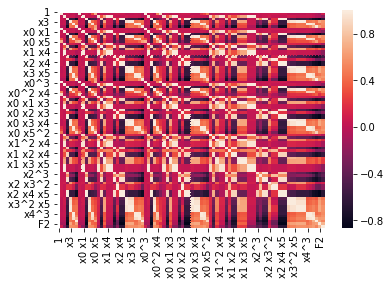

In [504]:
import statsmodels.formula.api as sm

corr = corr_df.corr()

sns.heatmap(corr)


In [505]:
corr = feature_df.corr()

columns = np.full((corr.shape[0],), True, dtype=bool)

for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            columns[j] = False
            
# print(*list(zip(corr.columns, columns)), sep='\n')

selected_columns = feature_df.columns[columns]

feature_df_new = feature_df[selected_columns]

print(df.columns)
print(feature_df.columns)
print(feature_df_new.columns)
print("A total of {} columns have been removed.".format(len(feature_df.columns)- len(feature_df_new.columns)))

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')
Index(['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x0^2', 'x0 x1', 'x0 x2',
       'x0 x3', 'x0 x4', 'x0 x5', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5',
       'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x3^2', 'x3 x4', 'x3 x5', 'x4^2',
       'x4 x5', 'x5^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0^2 x3', 'x0^2 x4',
       'x0^2 x5', 'x0 x1^2', 'x0 x1 x2', 'x0 x1 x3', 'x0 x1 x4', 'x0 x1 x5',
       'x0 x2^2', 'x0 x2 x3', 'x0 x2 x4', 'x0 x2 x5', 'x0 x3^2', 'x0 x3 x4',
       'x0 x3 x5', 'x0 x4^2', 'x0 x4 x5', 'x0 x5^2', 'x1^3', 'x1^2 x2',
       'x1^2 x3', 'x1^2 x4', 'x1^2 x5', 'x1 x2^2', 'x1 x2 x3', 'x1 x2 x4',
       'x1 x2 x5', 'x1 x3^2', 'x1 x3 x4', 'x1 x3 x5', 'x1 x4^2', 'x1 x4 x5',
       'x1 x5^2', 'x2^3', 'x2^2 x3', 'x2^2 x4', 'x2^2 x5', 'x2 x3^2',
       'x2 x3 

## 4d. Filtering features based on p-values (with statsmodels Linear Regression)


In [506]:
x = feature_df_new
y = target_df
print(x.columns)

import statsmodels.formula.api as sm

def pValueElimination(x, y,columns, sl=0.05):
    numVars = len(columns)
    for i in range(0, numVars):
        regOLS = sm.OLS(y, x).fit()
        maxVar = max(regOLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regOLS.pvalues[j].astype(float) == maxVar):
#                     print(columns)
                    x = np.delete(x,j,1)
                    columns = np.delete(columns, j)
                    
    print(regOLS.summary())
    return x, columns
    
modeled_data, selected_columns = pValueElimination(x.values, y.values, x.columns)
model_df = pd.DataFrame(modeled_data, columns=selected_columns)
print(df.head(1), "\n+++++++++++++++++++\n")
print(feature_df.head(1), "\n+++++++++++++++++++\n")
print(model_df.head(1))

model_df.to_csv("engineered.csv")


Index(['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x0 x5', 'x1 x2', 'x1 x3',
       'x2 x3', 'x1 x2 x3', 'x2^2 x3', 'x2 x3^2', 'F2'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     1432.
Date:                Sun, 23 Jun 2019   Prob (F-statistic):          3.27e-282
Time:                        18:55:15   Log-Likelihood:                -1446.6
No. Observations:                 414   AIC:                             2907.
Df Residuals:                     407   BIC:                             2935.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|  

Highly correlated features are removed due to high collinearity.
For any model, we establish a null hypothesis that claims that the selected dependent variables (i.e. house price) **does not have any effect** on independent variables. This means it is less likely to generate statistical observations more than or equal to those of observed results.

With a small p-value (below 0.05), we reject the null hypothesis. This means the observation is less likely to be generated under 

The features with adequate correlation and in combination produce a model with a low enough p-value are:
1. House Age
2. Number of Convenience Stores
3. Latitude
4. Longitude
5. Transaction Date * Longitude
6. Distance to MRT * Number of Convenience Stores
7. Log of Reciprocal of Distance to MRT (F2)

# 5. Building Regression Models

## 5a.i.  Linear Regression with Engineered Features

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


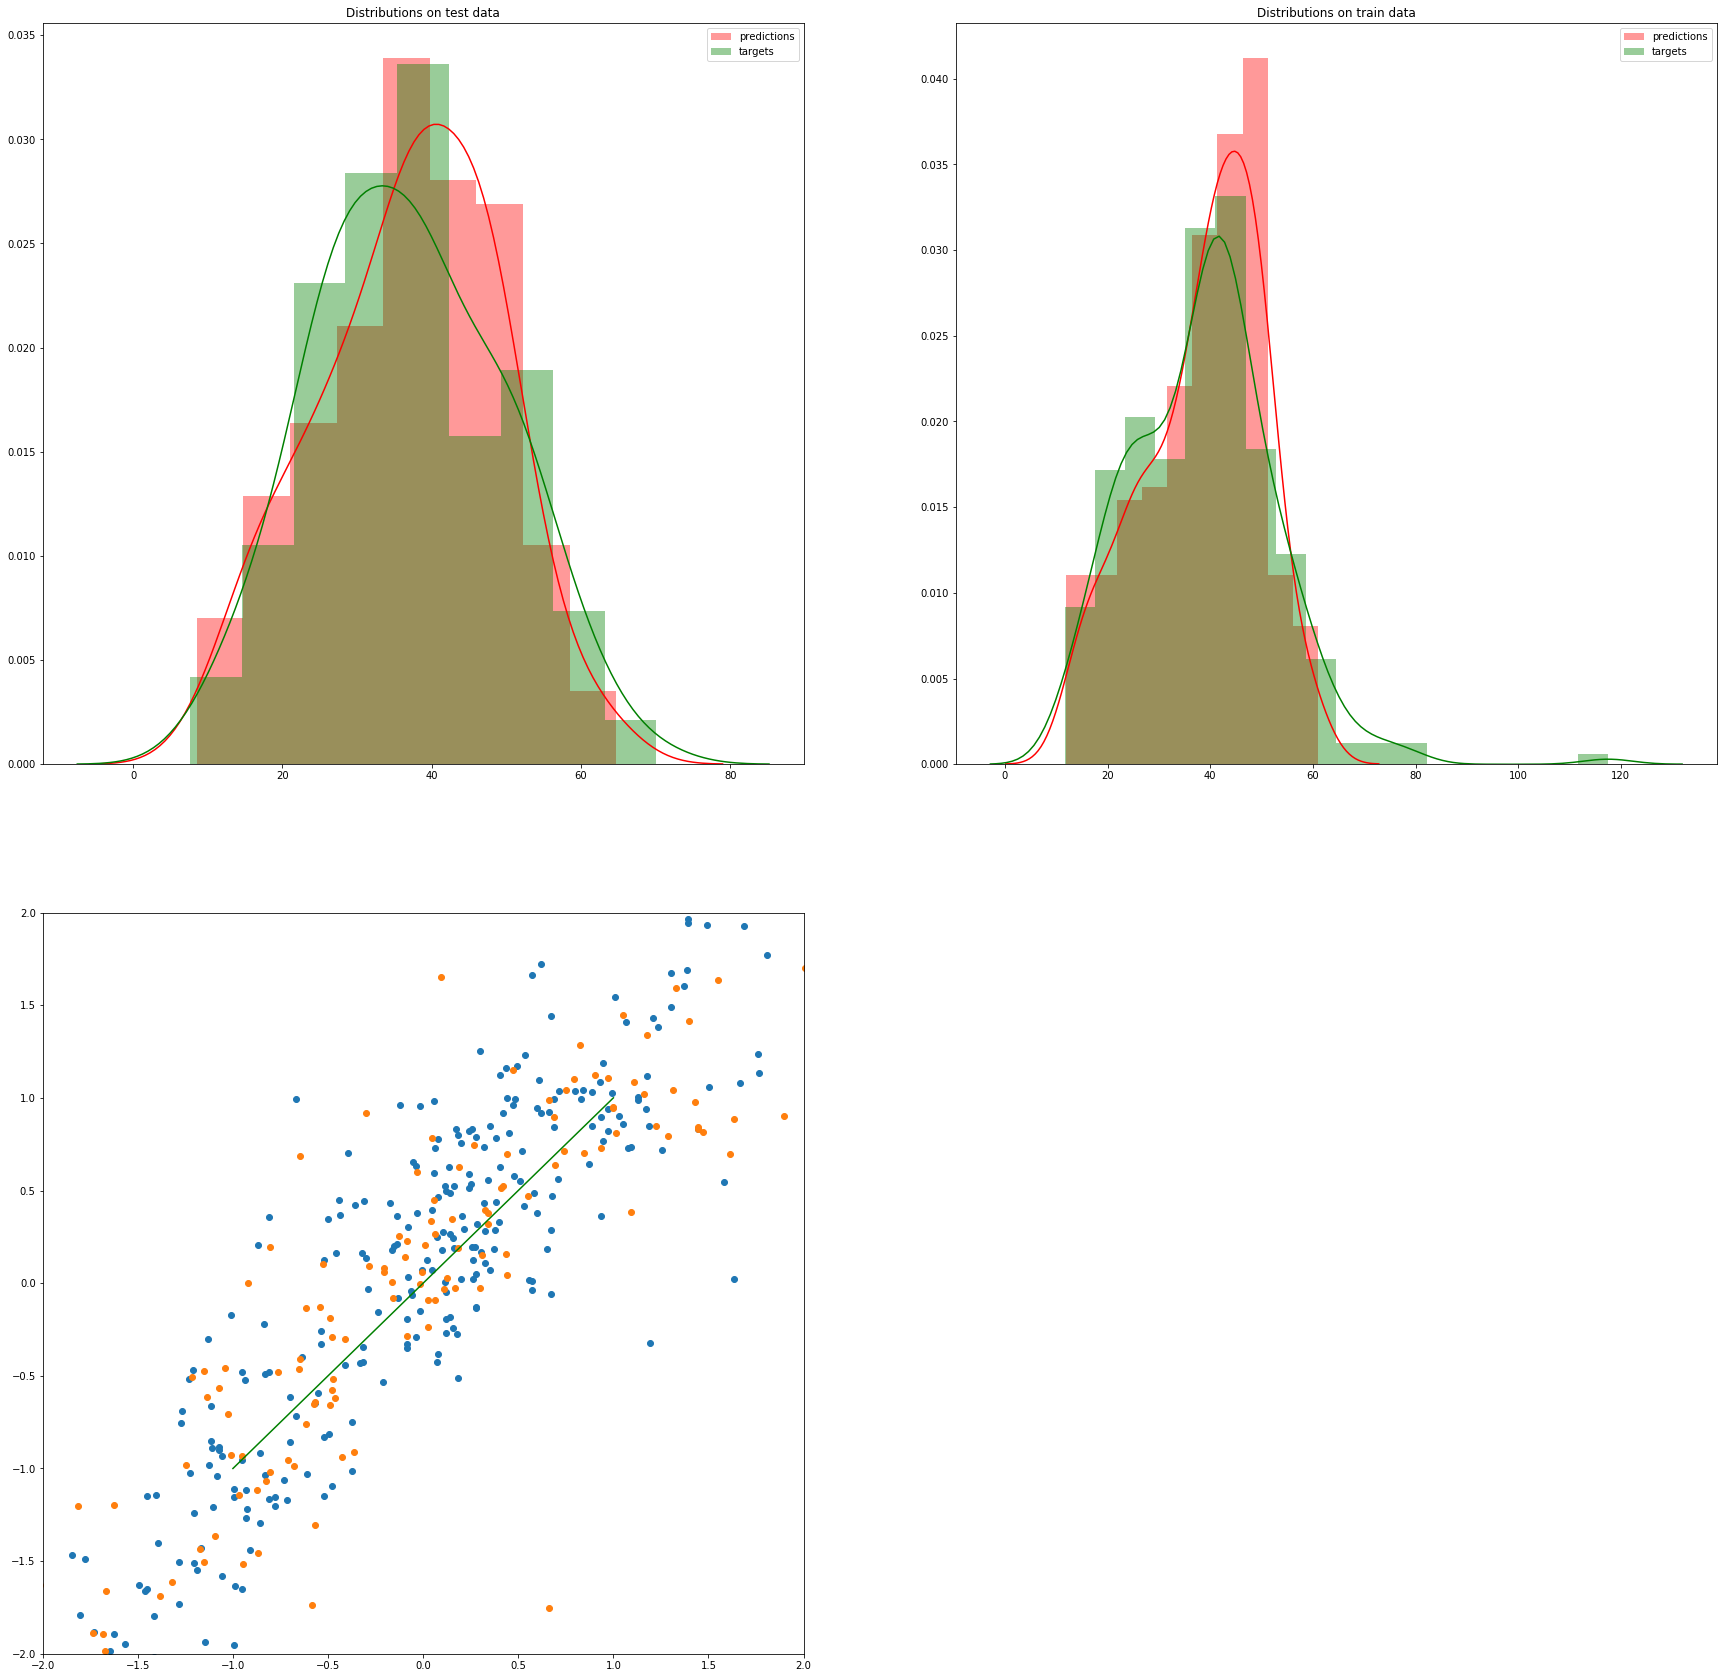

R2 Validation = 0.570308075896756


In [516]:

x_df =  pd.read_csv("engineered.csv")
y_df = target_df

x_train, x_test, y_train, y_test = train_test_split(x_df.values,
                                                    y_df.values, 
                                                    test_size=0.33, 
                                                    random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)


predictions_train =  model.predict(x_train)
predictions_test = model.predict(x_test)
targets_test = (y_test)
targets_train = (y_train)

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(30,30))
sns.distplot(predictions_test, color="r", label="predictions", ax=ax[0][0])
sns.distplot(targets_test, color="g", label="targets", ax=ax[0][0])
ax[0][0].legend()
ax[0][0].set_title("Distributions on test data")

sns.distplot(predictions_train, color="r", label="predictions", ax=ax[0][1])
sns.distplot(targets_train, color="g", label="targets", ax=ax[0][1])
ax[0][1].legend()
ax[0][1].set_title("Distributions on train data")

ax[1][0].scatter(z_score_normalize(targets_train), z_score_normalize(predictions_train), label = 'train')
ax[1][0].scatter(z_score_normalize(targets_test), z_score_normalize(predictions_test), label = 'test')
ax[1][0].plot(np.linspace(-1,1, num=140), np.linspace(-1, 1, num=140), label='perfect predictions', c="green")
ax[1][0].set_xlim((-2,2))
ax[1][0].set_ylim((-2,2))

ax[1][1].axis('off')
plt.show()

# R2 score on prediction
from sklearn.metrics import r2_score

score = r2_score(predictions_test, targets_test)
print("R2 Validation = {}".format(score))

model1 = model

In [517]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x_df = pd.read_csv("engineered.csv")
y_df = target_df
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
scores= []
    
for train_idx, test_idx in kf.split(x_df.values, y_df.values):
    x_train = x_df.loc[train_idx]
    y_train = y_df.loc[train_idx]
    x_test = x_df.loc[test_idx]
    y_test = y_df.loc[test_idx]
    model = LinearRegression()
    model = model.fit(x_train, y_train)
    predictions_test = model.predict(x_test)
    score = r2_score(predictions_test, y_test)
    scores.append(score)
    print("R2 score ", score)
    
print("Cross Validated Score: ", np.mean(scores))

    
    

R2 score  0.7966888262857215
R2 score  0.660386993728721
R2 score  -0.8018227977966543
R2 score  0.28366382582902494
R2 score  0.7659122148179905
R2 score  0.45184535562542794
R2 score  0.46909511323687314
R2 score  0.5103435913488723
R2 score  0.4926465722936474
R2 score  0.6440925882735176
Cross Validated Score:  0.42728522836431415


## 5a.ii. Linear Regressor with Engineered, Normalised Features


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     4.251
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           7.97e-05
Time:                        19:03:07   Log-Likelihood:                -1405.7
No. Observations:                 277   AIC:                             2827.
Df Residuals:                     269   BIC:                             2856.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8624      2.453      0.352      0.7

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


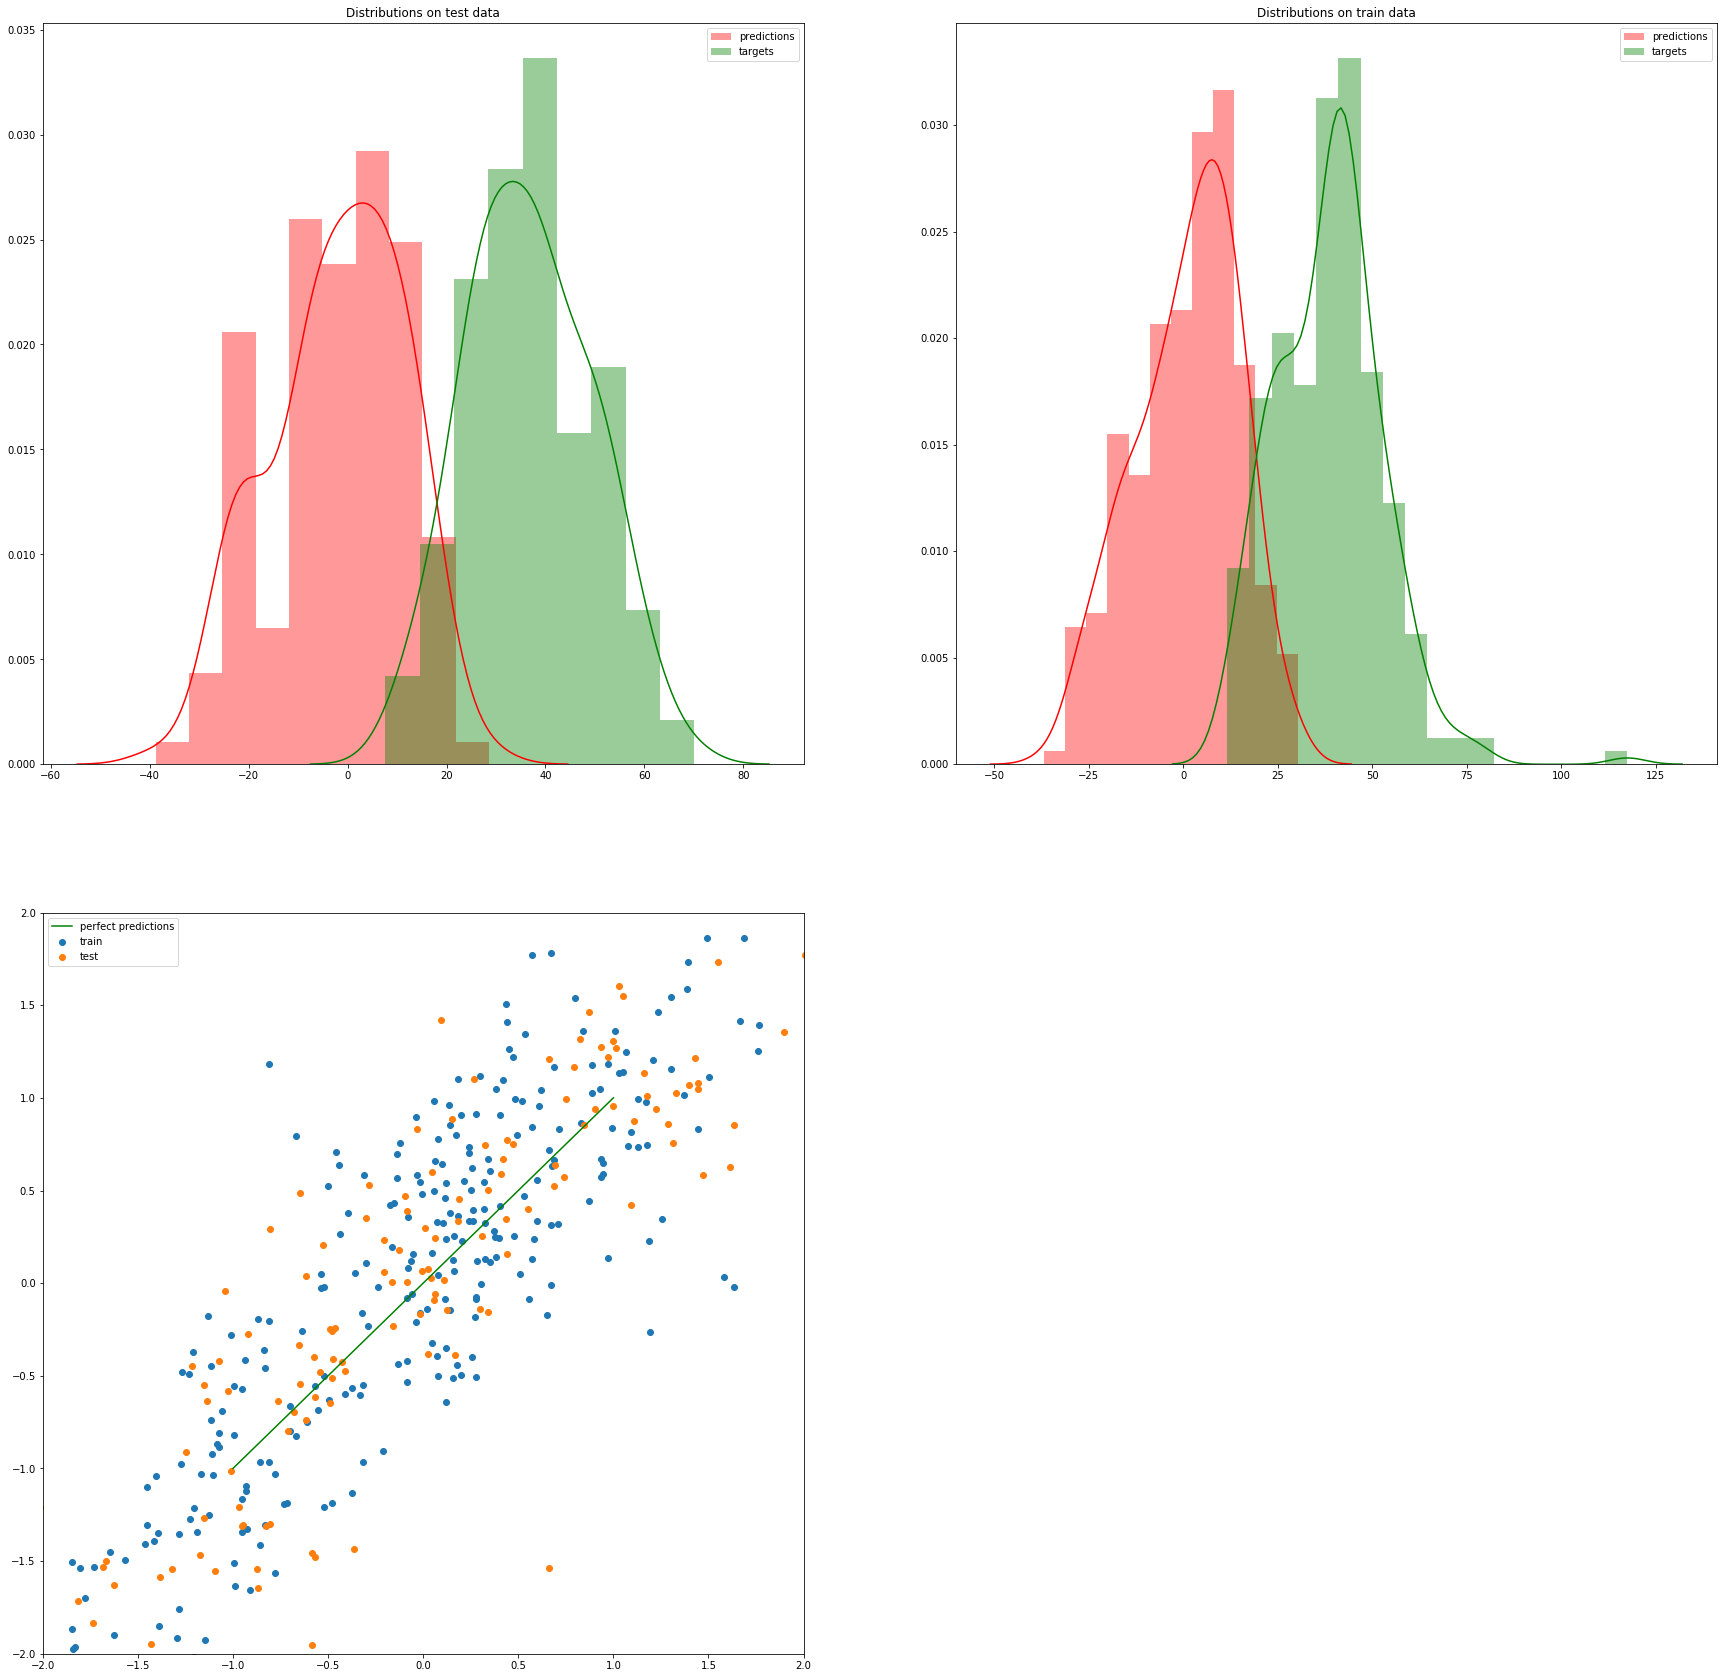

R2 Validation = -7.817930867315509


In [521]:
x_df = pd.read_csv("engineered.csv")
y_df = target_df

for col in x_df.columns:
    x_df[col] = z_score_normalize(x_df[col])
    
x_train, x_test, y_train, y_test = train_test_split(x_df.values, y_df.values, test_size=0.33, random_state=42)

model2 = sm.OLS(y_train, x_train)
results = model2.fit()
print(results.summary())

predictions_train =  (np.dot(x_train,results.params))
predictions_test = (np.dot(x_test,results.params))
targets_test = (y_test)
targets_train = (y_train)

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(30,30))
sns.distplot(predictions_test, color="r", label="predictions", ax=ax[0][0])
sns.distplot(targets_test, color="g", label="targets", ax=ax[0][0])
ax[0][0].legend()
ax[0][0].set_title("Distributions on test data")

sns.distplot(predictions_train, color="r", label="predictions", ax=ax[0][1])
sns.distplot(targets_train, color="g", label="targets", ax=ax[0][1])
ax[0][1].legend()
ax[0][1].set_title("Distributions on train data")

ax[1][0].scatter(z_score_normalize(targets_train), z_score_normalize(predictions_train), label = 'train')
ax[1][0].scatter(z_score_normalize(targets_test), z_score_normalize(predictions_test), label = 'test')
ax[1][0].plot(np.linspace(-1,1, num=140), np.linspace(-1, 1, num=140), label='perfect predictions', c="green")
ax[1][0].set_xlim((-2,2))
ax[1][0].set_ylim((-2,2))
ax[1][0].legend()

ax[1][1].axis('off')
plt.show()

score = r2_score(predictions_test, targets_test)
print("R2 Validation = {}".format(score))


In [520]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

x_df = pd.read_csv("engineered.csv")
for col in x_df.columns:
    x_df[col] = z_score_normalize(x_df[col])
y_df = target_df
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
scores= []
    
for train_idx, test_idx in kf.split(x_df.values, y_df.values):
    x_train = x_df.loc[train_idx]
    y_train = y_df.loc[train_idx]
    x_test = x_df.loc[test_idx]
    y_test = y_df.loc[test_idx]
    model = LinearRegression().fit(x_train, y_train)
    predictions_test = model.predict(x_test)
    score = r2_score(predictions_test, y_test)
    scores.append(score)
    print("R2 score ", score)
    
print("Cross Validated Score: ", np.mean(scores))

R2 score  0.7966888262857863
R2 score  0.6603869937283677
R2 score  -0.8018227977968522
R2 score  0.2836638258288403
R2 score  0.765912214818008
R2 score  0.45184535562550265
R2 score  0.46909511323683506
R2 score  0.5103435913488372
R2 score  0.49264657229362685
R2 score  0.6440925882736163
Cross Validated Score:  0.42728522836425686


We have created a linear regression model with high accuracy, better validation score and engineered features. However, we are left with saving the model and implementing it for later. 

However since our validation score < training score, our model may suffer from overfit.

In the meantime, we can compare model performance on other frameworks. But since only statsmodels has a function for certain statistical measures, we need to build our own functions to compare all models on an even field.

We shall use the following:
1. Dummy Regressor
2. AdaBoost Regressor 
3. Decision Tree Regressor
4. Random Forest Regressor
5. MLP Regressor
6. Bagging Regressor



## 5c. Dummy Regressor


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


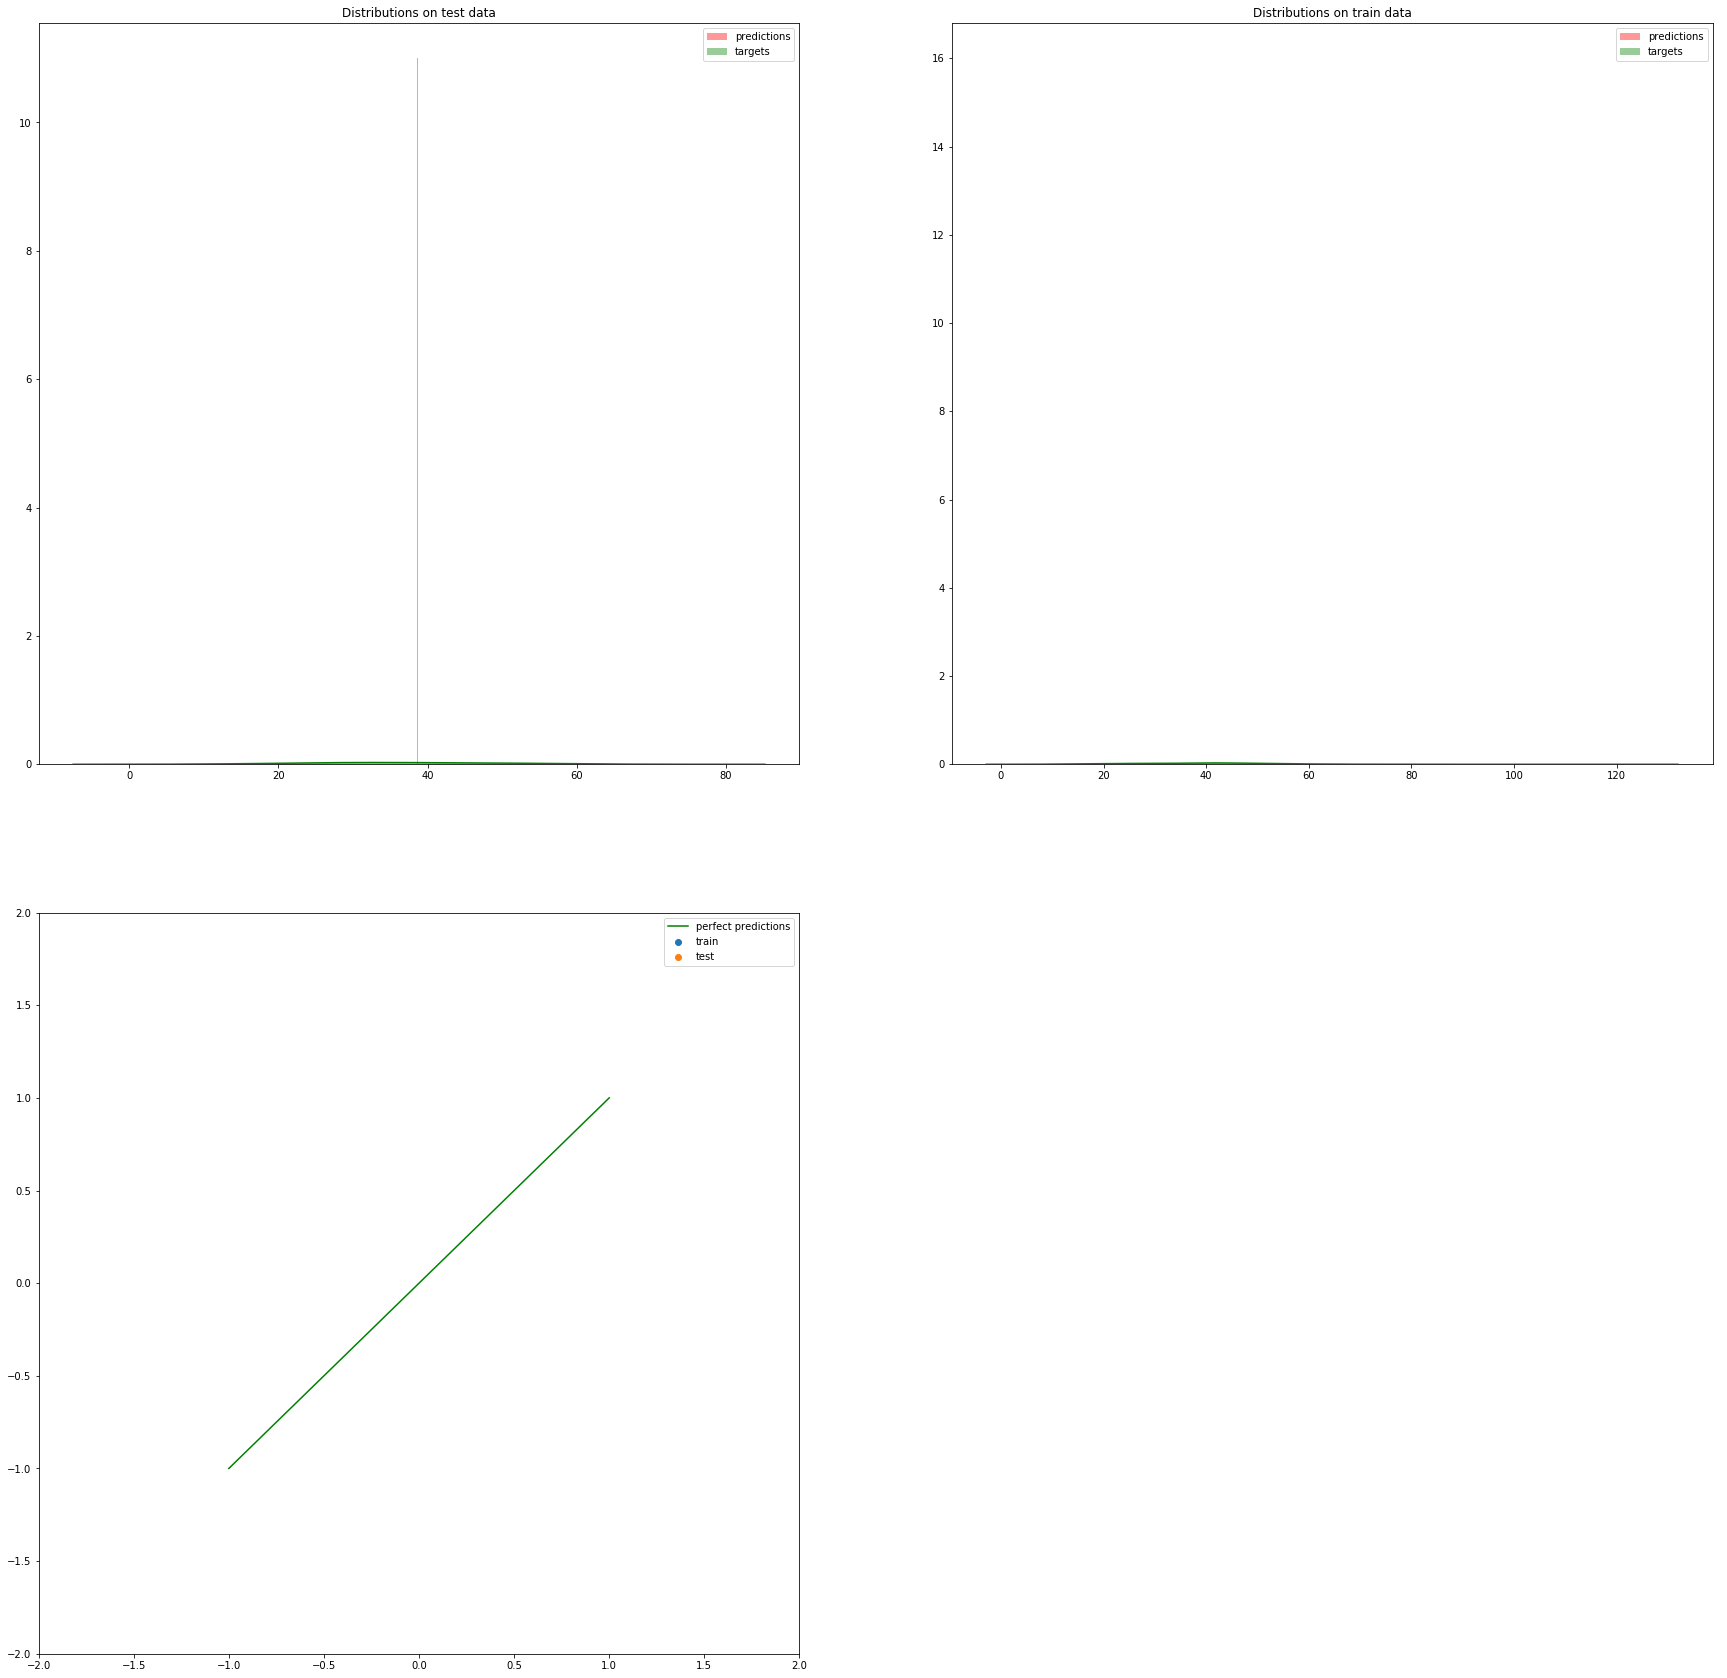

R2 score  0.0
R2 score  -2.846202555137071e+30
R2 score  0.0
R2 score  0.0
R2 score  0.0
R2 score  0.0
R2 score  0.0
R2 score  0.0
R2 score  0.0
R2 score  0.0
Cross Validation Score:  -2.8462025551370713e+29


In [522]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor()

x_df =  pd.read_csv("engineered.csv")
y_df = target_df

x_train, x_test, y_train, y_test = train_test_split(x_df.values,
                                                    y_df.values, 
                                                    test_size=0.33, 
                                                    random_state=42)
dummy.fit(x_train, y_train)
predictions_train = dummy.predict(x_train)
predictions_test = dummy.predict(x_test)
targets_train = y_train
targets_test = y_test

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(30,30))
sns.distplot(predictions_test, color="r", label="predictions", ax=ax[0][0])
sns.distplot(targets_test, color="g", label="targets", ax=ax[0][0])
ax[0][0].legend()
ax[0][0].set_title("Distributions on test data")

sns.distplot(predictions_train, color="r", label="predictions", ax=ax[0][1])
sns.distplot(targets_train, color="g", label="targets", ax=ax[0][1])
ax[0][1].legend()
ax[0][1].set_title("Distributions on train data")

ax[1][0].scatter(z_score_normalize(targets_train), z_score_normalize(predictions_train), label = 'train')
ax[1][0].scatter(z_score_normalize(targets_test), z_score_normalize(predictions_test), label = 'test')
ax[1][0].plot(np.linspace(-1,1, num=140), np.linspace(-1, 1, num=140), label='perfect predictions', c="green")
ax[1][0].set_xlim((-2,2))
ax[1][0].set_ylim((-2,2))
ax[1][0].legend()

ax[1][1].axis('off')
plt.show()

from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

    
y_df = target_df
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
scores= []
    
for train_idx, test_idx in kf.split(x_df.values, y_df.values):
    x_train = x_df.loc[train_idx]
    y_train = y_df.loc[train_idx]
    x_test = x_df.loc[test_idx]
    y_test = y_df.loc[test_idx]
    dummy = DummyRegressor()
    dummy.fit(x_train, y_train)
    predictions_test = dummy.predict(x_test)
    score = r2_score(predictions_test, y_test)
    scores.append(score)
    print("R2 score ", score)
    
print("Cross Validation Score: ", np.mean(scores))

## 5d. AdaBoost Regressor


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


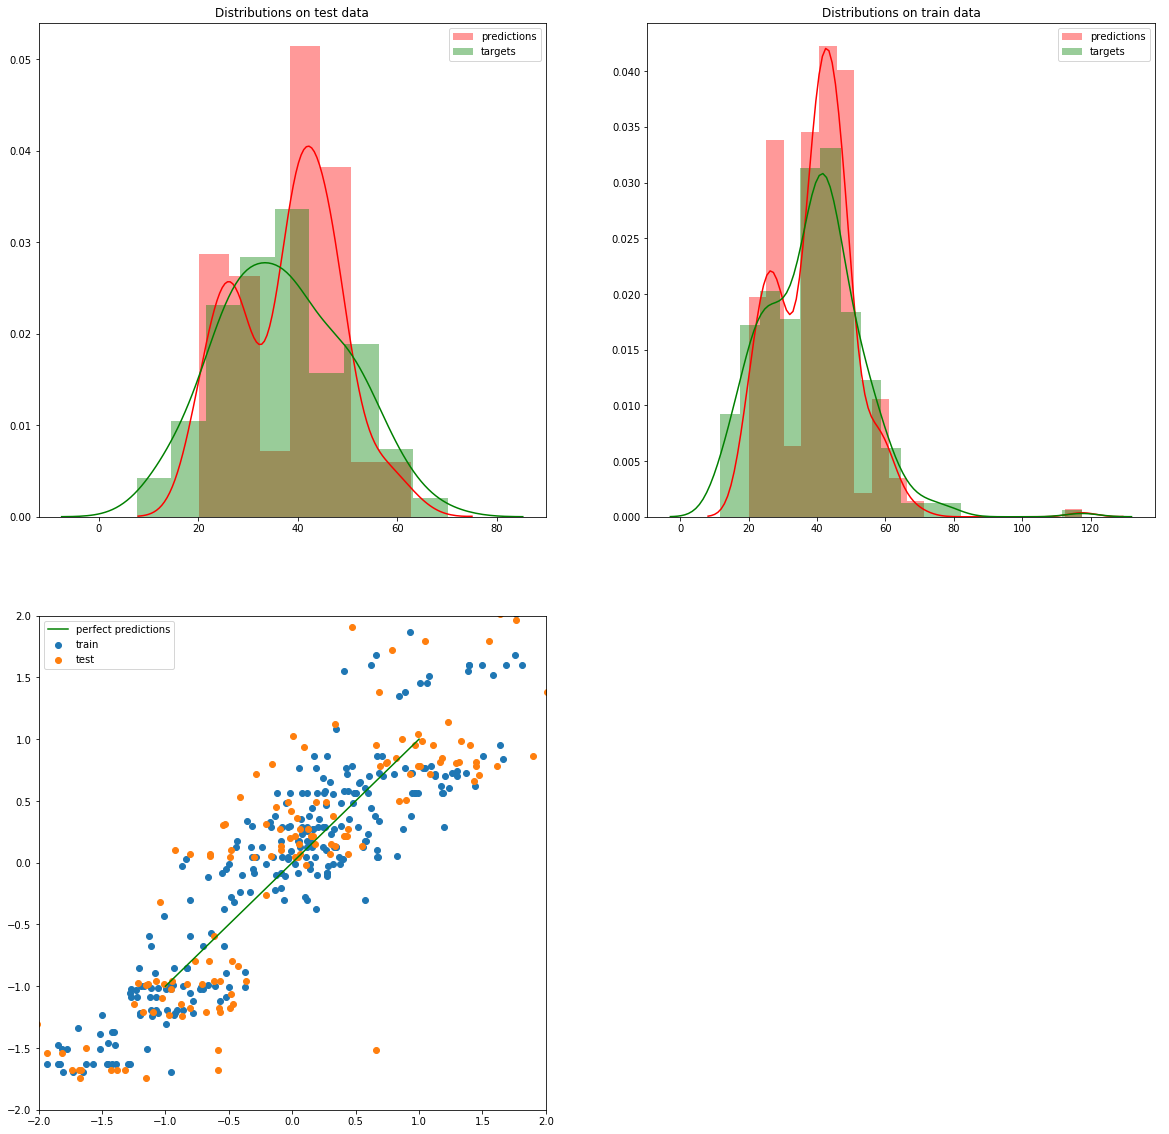

R2 score  0.7019829199947587
R2 score  0.4575249470858984
R2 score  -0.7363102463683997
R2 score  0.4586585011326907
R2 score  0.5537314698824609
R2 score  0.4641052219450087
R2 score  0.3960356191893305
R2 score  0.5652792280909675
R2 score  0.419441415943942
R2 score  0.45792909546796023
Cross Validation Score:  0.37383781723646176


In [523]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor()

x_df =  pd.read_csv("engineered.csv")
y_df = target_df

x_train, x_test, y_train, y_test = train_test_split(x_df.values,
                                                    y_df.values, 
                                                    test_size=0.33, 
                                                    random_state=42)

adaboost.fit(x_train, y_train)
predictions_train = adaboost.predict(x_train)
predictions_test = adaboost.predict(x_test)
targets_train = y_train
targets_test = y_test

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,20))
sns.distplot(predictions_test, color="r", label="predictions", ax=ax[0][0])
sns.distplot(targets_test, color="g", label="targets", ax=ax[0][0])
ax[0][0].legend()
ax[0][0].set_title("Distributions on test data")

sns.distplot(predictions_train, color="r", label="predictions", ax=ax[0][1])
sns.distplot(targets_train, color="g", label="targets", ax=ax[0][1])
ax[0][1].legend()
ax[0][1].set_title("Distributions on train data")

ax[1][0].scatter(z_score_normalize(targets_train), z_score_normalize(predictions_train), label = 'train')
ax[1][0].scatter(z_score_normalize(targets_test), z_score_normalize(predictions_test), label = 'test')
ax[1][0].plot(np.linspace(-1,1, num=140), np.linspace(-1, 1, num=140), label='perfect predictions', c="green")
ax[1][0].set_xlim((-2,2))
ax[1][0].set_ylim((-2,2))
ax[1][0].legend()

ax[1][1].axis('off')
plt.show()

from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

y_df = target_df
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
scores= []
    
for train_idx, test_idx in kf.split(x_df.values, y_df.values):
    x_train = x_df.loc[train_idx]
    y_train = y_df.loc[train_idx]
    x_test = x_df.loc[test_idx]
    y_test = y_df.loc[test_idx]
    adaboost =  AdaBoostRegressor()
    adaboost.fit(x_train, y_train)
    predictions_test = adaboost.predict(x_test)
    score = r2_score(predictions_test, y_test)
    scores.append(score)
    print("R2 score ", score)
    
print("Cross Validation Score: ", np.mean(scores))

## 5e. Decision Tree Regressor


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


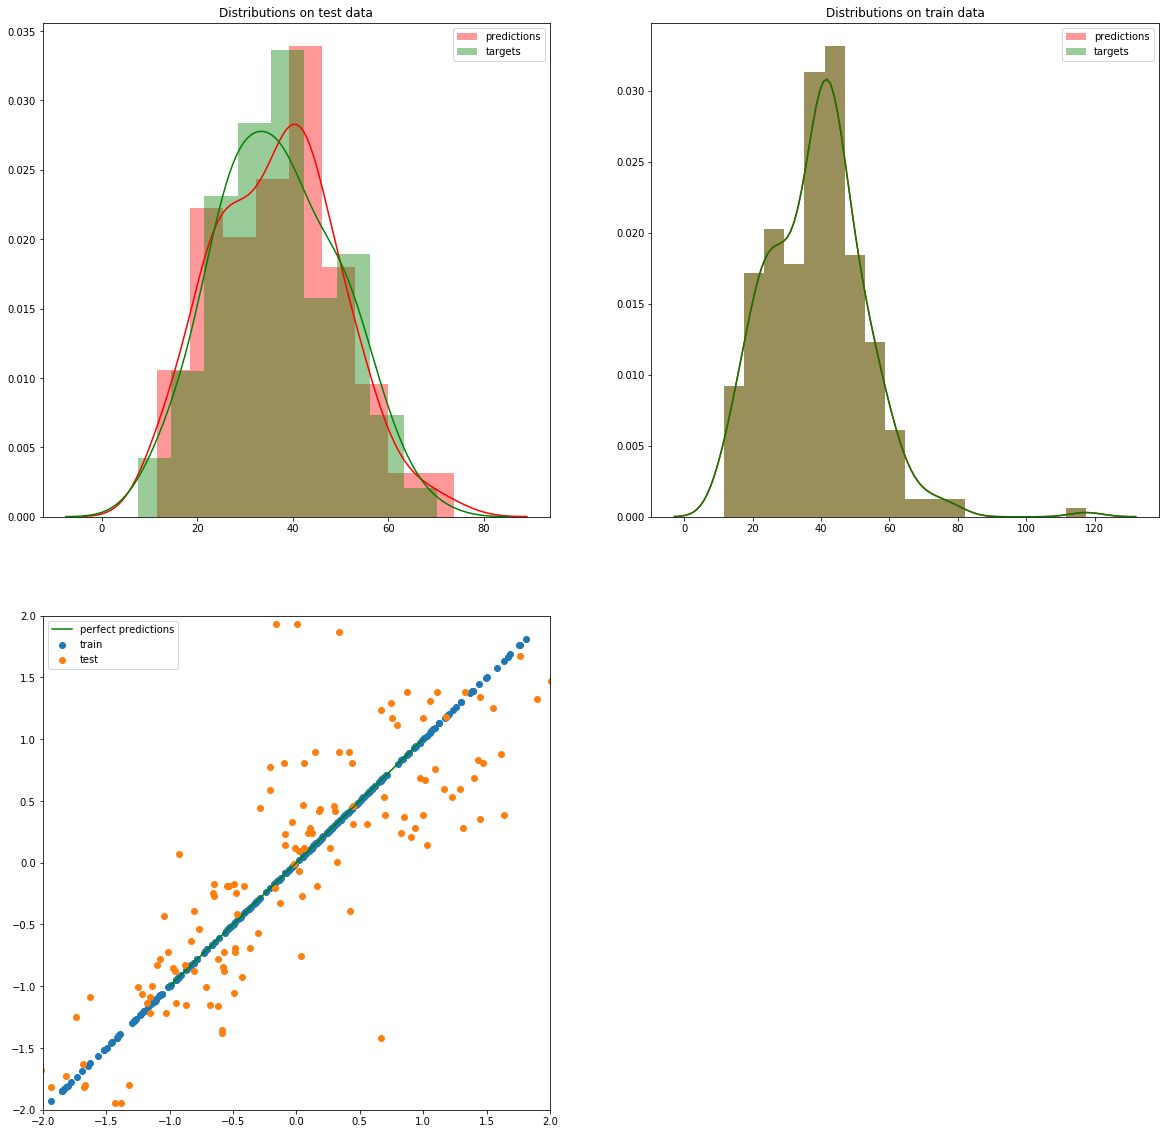

R2 score  0.7682497790389644
R2 score  0.608415454938205
R2 score  -0.18434961011544138
R2 score  0.4959742397111334
R2 score  0.5268064339107384
R2 score  0.44890255424528536
R2 score  0.2256994301221633
R2 score  0.5851608818198664
R2 score  0.5371244874542869
R2 score  0.6047569432169365
Cross Validation Score:  0.4616740594342138


In [524]:
from sklearn.tree import DecisionTreeRegressor

dectree = DecisionTreeRegressor()

x_df =  pd.read_csv("engineered.csv")
y_df = target_df

x_train, x_test, y_train, y_test = train_test_split(x_df.values,
                                                    y_df.values, 
                                                    test_size=0.33, 
                                                    random_state=42)

dectree.fit(x_train, y_train)
predictions_train = dectree.predict(x_train)
predictions_test = dectree.predict(x_test)
targets_train = y_train
targets_test = y_test

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,20))
sns.distplot(predictions_test, color="r", label="predictions", ax=ax[0][0])
sns.distplot(targets_test, color="g", label="targets", ax=ax[0][0])
ax[0][0].legend()
ax[0][0].set_title("Distributions on test data")

sns.distplot(predictions_train, color="r", label="predictions", ax=ax[0][1])
sns.distplot(targets_train, color="g", label="targets", ax=ax[0][1])
ax[0][1].legend()
ax[0][1].set_title("Distributions on train data")

ax[1][0].scatter(z_score_normalize(targets_train), z_score_normalize(predictions_train), label = 'train')
ax[1][0].scatter(z_score_normalize(targets_test), z_score_normalize(predictions_test), label = 'test')
ax[1][0].plot(np.linspace(-1,1, num=140), np.linspace(-1, 1, num=140), label='perfect predictions', c="green")
ax[1][0].set_xlim((-2,2))
ax[1][0].set_ylim((-2,2))
ax[1][0].legend()

ax[1][1].axis('off')
plt.show()

from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

y_df = target_df
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
scores= []
    
for train_idx, test_idx in kf.split(x_df.values, y_df.values):
    x_train = x_df.loc[train_idx]
    y_train = y_df.loc[train_idx]
    x_test = x_df.loc[test_idx]
    y_test = y_df.loc[test_idx]
    dectree = DecisionTreeRegressor()
    dectree.fit(x_train, y_train)
    predictions_test = dectree.predict(x_test)
    score = r2_score(predictions_test, y_test)
    scores.append(score)
    print("R2 score ", score)
    
print("Cross Validation Score: ", np.mean(scores))


## 5f. Random Forest Regressor


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


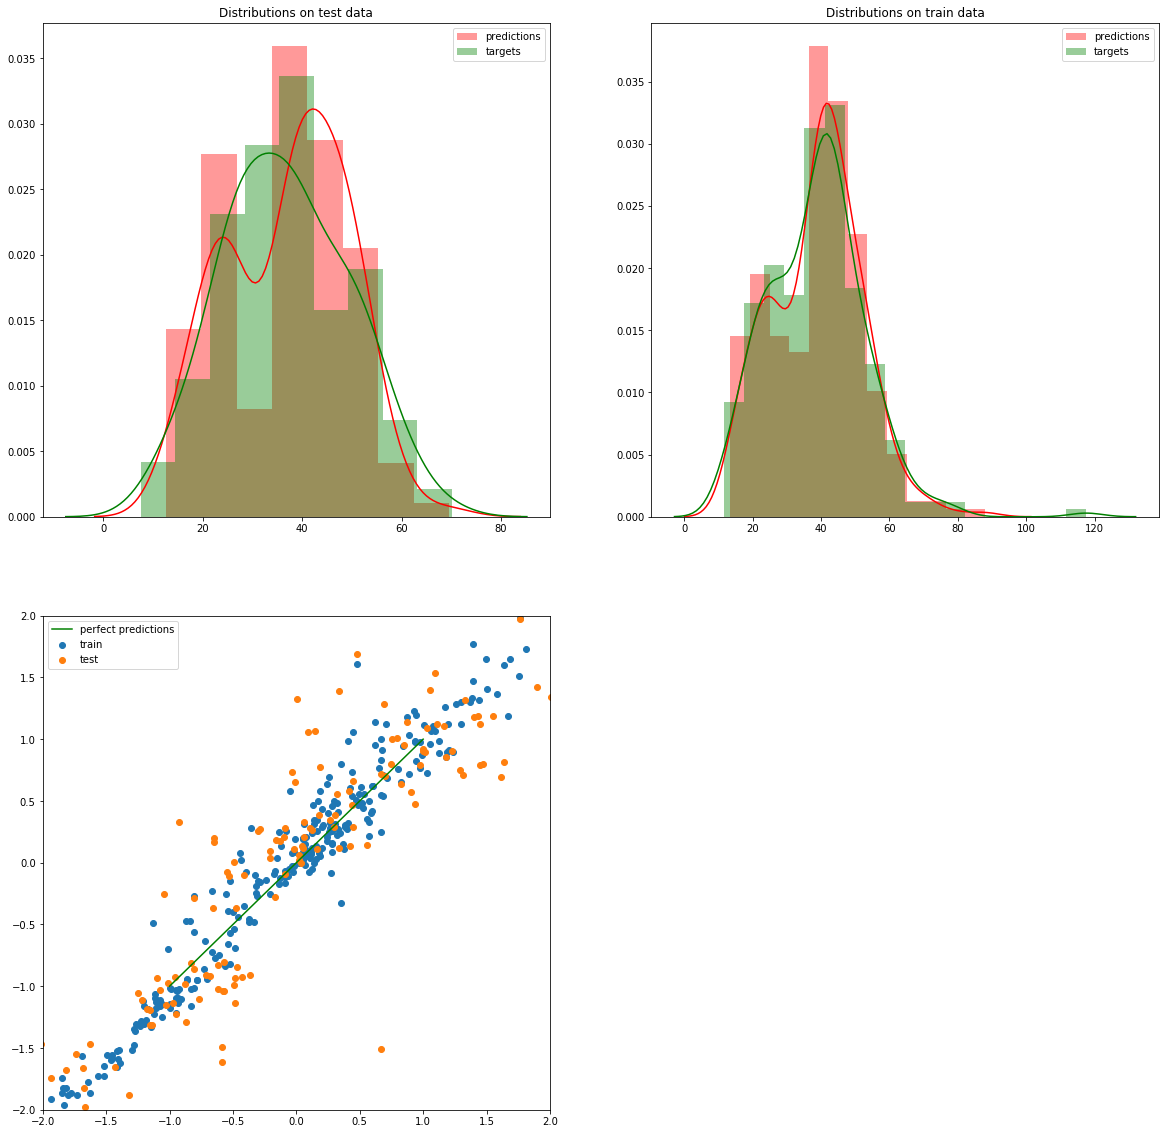

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

Cross Validation Score:  0.5620360633468123


In [525]:
from sklearn.ensemble import RandomForestRegressor

rforest = RandomForestRegressor()

x_df =  pd.read_csv("engineered.csv")
y_df = target_df

x_train, x_test, y_train, y_test = train_test_split(x_df.values,
                                                    y_df.values, 
                                                    test_size=0.33, 
                                                    random_state=42)

rforest.fit(x_train, y_train)
predictions_train = rforest.predict(x_train)
predictions_test = rforest.predict(x_test)
targets_train = y_train
targets_test = y_test

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,20))
sns.distplot(predictions_test, color="r", label="predictions", ax=ax[0][0])
sns.distplot(targets_test, color="g", label="targets", ax=ax[0][0])
ax[0][0].legend()
ax[0][0].set_title("Distributions on test data")

sns.distplot(predictions_train, color="r", label="predictions", ax=ax[0][1])
sns.distplot(targets_train, color="g", label="targets", ax=ax[0][1])
ax[0][1].legend()
ax[0][1].set_title("Distributions on train data")

ax[1][0].scatter(z_score_normalize(targets_train), z_score_normalize(predictions_train), label = 'train')
ax[1][0].scatter(z_score_normalize(targets_test), z_score_normalize(predictions_test), label = 'test')
ax[1][0].plot(np.linspace(-1,1, num=140), np.linspace(-1, 1, num=140), label='perfect predictions', c="green")
ax[1][0].set_xlim((-2,2))
ax[1][0].set_ylim((-2,2))
ax[1][0].legend()

ax[1][1].axis('off')
plt.show()

from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

y_df = target_df
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
scores= []
    
for train_idx, test_idx in kf.split(x_df.values, y_df.values):
    x_train = x_df.loc[train_idx]
    y_train = y_df.loc[train_idx]
    x_test = x_df.loc[test_idx]
    y_test = y_df.loc[test_idx]
    rforest = RandomForestRegressor()
    rforest.fit(x_train, y_train)
    predictions_test = rforest.predict(x_test)
    score = r2_score(predictions_test, y_test)
    scores.append(score)
#     print("R2 score ", score)
    
print("Cross Validation Score: ", np.mean(scores))

## 5g. MLP Regressor


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


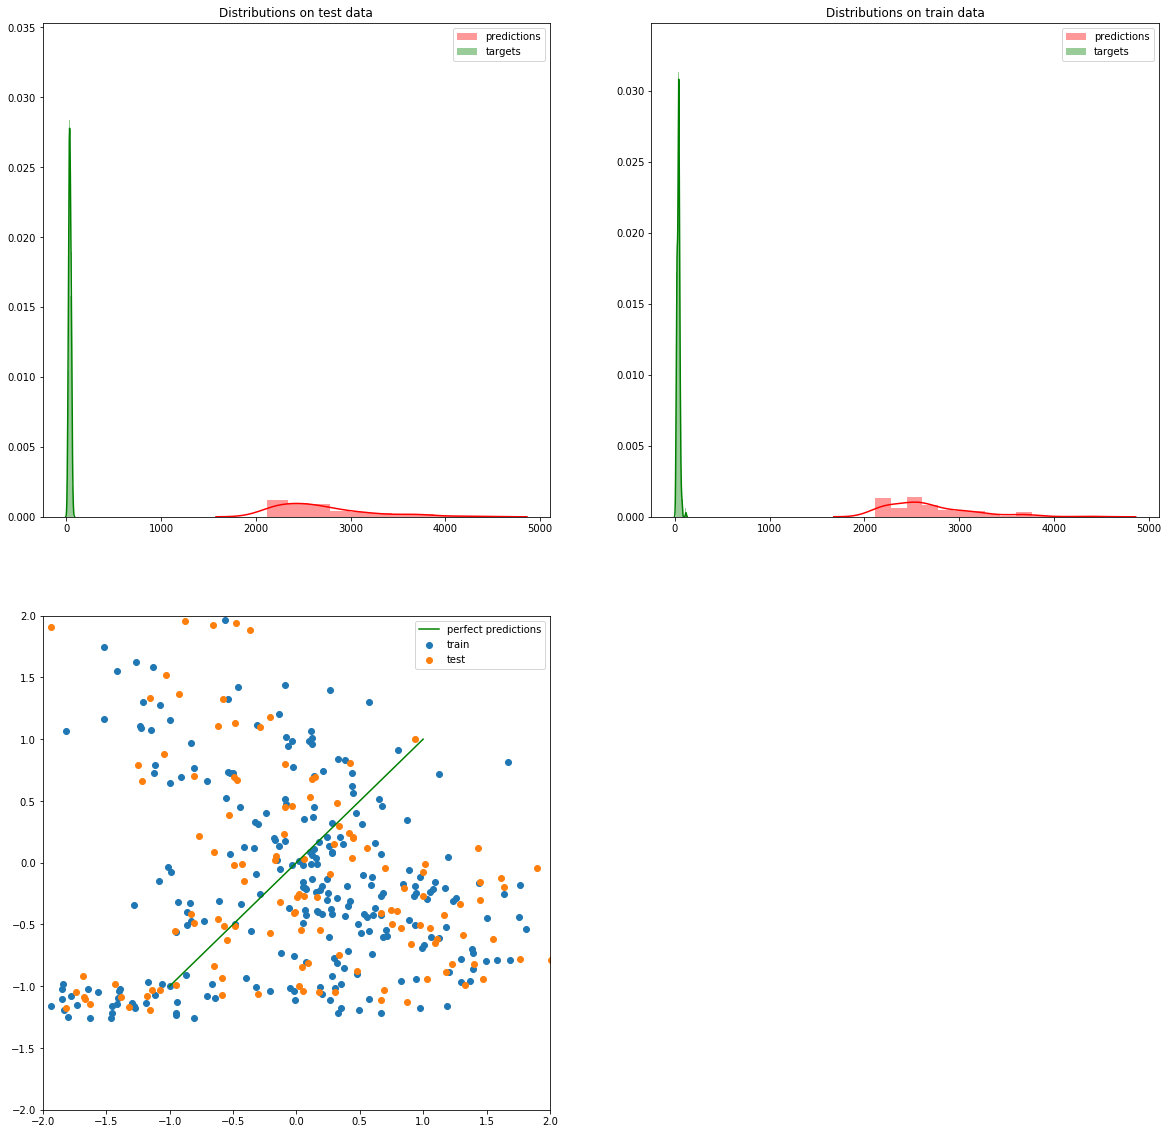

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Cross Validation Score:  -5.48036687823532


In [526]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor()

x_df =  pd.read_csv("engineered.csv")
y_df = target_df

x_train, x_test, y_train, y_test = train_test_split(x_df.values,
                                                    y_df.values, 
                                                    test_size=0.33, 
                                                    random_state=42)

mlp.fit(x_train, y_train)
predictions_train = mlp.predict(x_train)
predictions_test = mlp.predict(x_test)
targets_train = y_train
targets_test = y_test

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,20))
sns.distplot(predictions_test, color="r", label="predictions", ax=ax[0][0])
sns.distplot(targets_test, color="g", label="targets", ax=ax[0][0])
ax[0][0].legend()
ax[0][0].set_title("Distributions on test data")

sns.distplot(predictions_train, color="r", label="predictions", ax=ax[0][1])
sns.distplot(targets_train, color="g", label="targets", ax=ax[0][1])
ax[0][1].legend()
ax[0][1].set_title("Distributions on train data")

ax[1][0].scatter(z_score_normalize(targets_train), z_score_normalize(predictions_train), label = 'train')
ax[1][0].scatter(z_score_normalize(targets_test), z_score_normalize(predictions_test), label = 'test')
ax[1][0].plot(np.linspace(-1,1, num=140), np.linspace(-1, 1, num=140), label='perfect predictions', c="green")
ax[1][0].set_xlim((-2,2))
ax[1][0].set_ylim((-2,2))
ax[1][0].legend()

ax[1][1].axis('off')
plt.show()

from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

y_df = target_df
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
scores= []
    
for train_idx, test_idx in kf.split(x_df.values, y_df.values):
    x_train = x_df.loc[train_idx]
    y_train = y_df.loc[train_idx]
    x_test = x_df.loc[test_idx]
    y_test = y_df.loc[test_idx]
    mlp = MLPRegressor()
    mlp.fit(x_train, y_train)
    predictions_test = mlp.predict(x_test)
    score = r2_score(predictions_test, y_test)
    scores.append(score)
#     print("R2 score ", score)
    
print("Cross Validation Score: ", np.mean(scores))

## 5h. Bagging Regressor


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


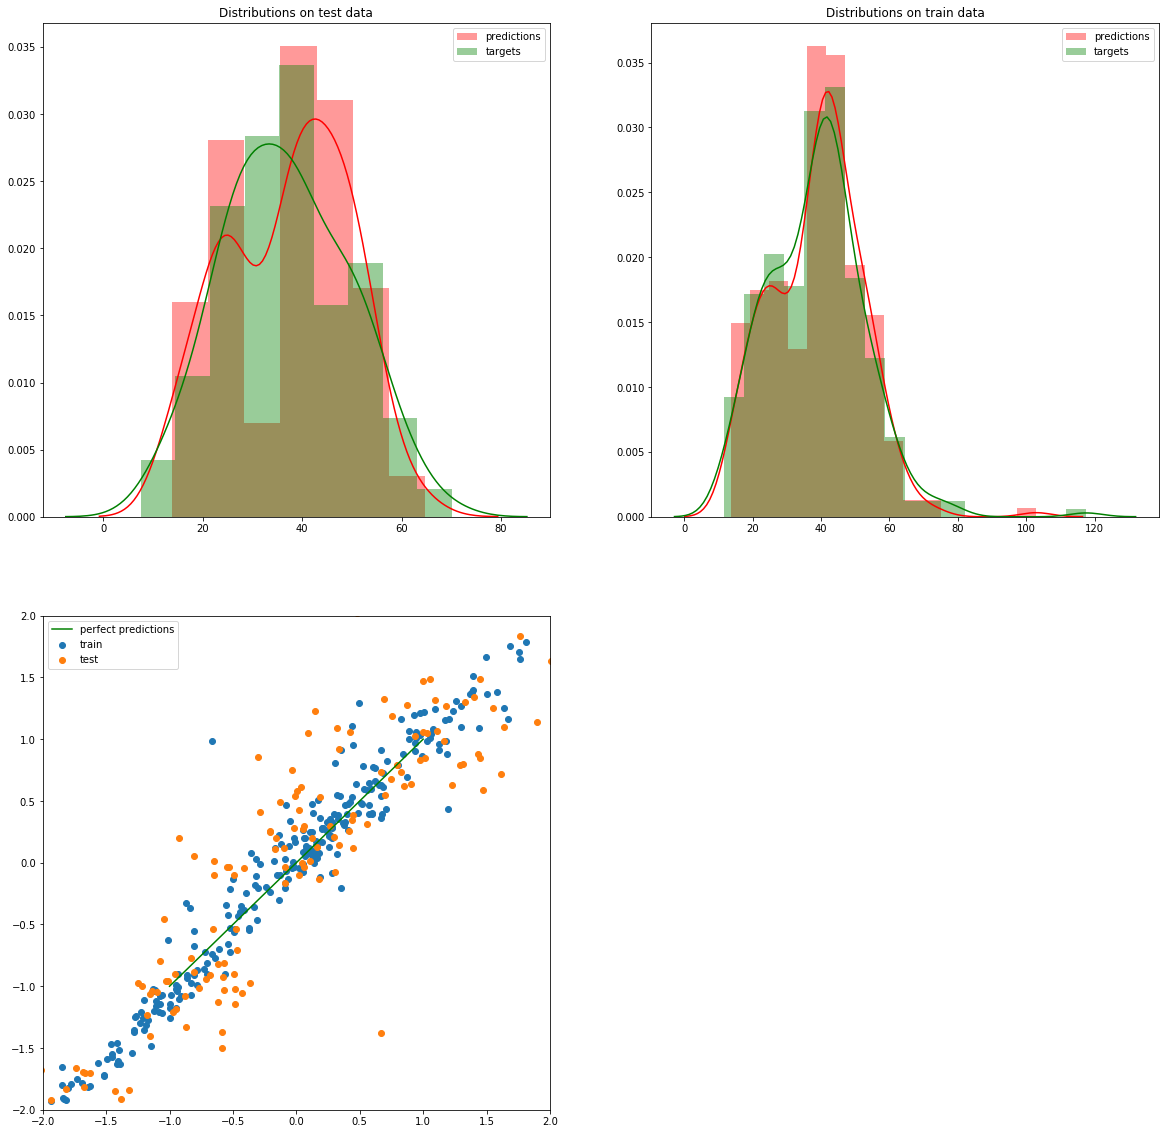

R2 score  0.777836753322238
R2 score  0.7154876463276625
R2 score  -0.3324358427648624
R2 score  0.6633230495113226
R2 score  0.6525173587686581
R2 score  0.56526029790649
R2 score  0.5206773400691778
R2 score  0.6262399998569865
R2 score  0.6056239102642094
R2 score  0.7349156283490965
Cross Validation Score:  0.5529446141610979


In [527]:
from sklearn.ensemble import BaggingRegressor

bagreg = BaggingRegressor()
x_df =  pd.read_csv("engineered.csv")
y_df = target_df

x_train, x_test, y_train, y_test = train_test_split(x_df.values,
                                                    y_df.values, 
                                                    test_size=0.33, 
                                                    random_state=42)

bagreg.fit(x_train, y_train)
predictions_train = bagreg.predict(x_train)
predictions_test = bagreg.predict(x_test)
targets_train = y_train
targets_test = y_test

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,20))
sns.distplot(predictions_test, color="r", label="predictions", ax=ax[0][0])
sns.distplot(targets_test, color="g", label="targets", ax=ax[0][0])
ax[0][0].legend()
ax[0][0].set_title("Distributions on test data")

sns.distplot(predictions_train, color="r", label="predictions", ax=ax[0][1])
sns.distplot(targets_train, color="g", label="targets", ax=ax[0][1])
ax[0][1].legend()
ax[0][1].set_title("Distributions on train data")

ax[1][0].scatter(z_score_normalize(targets_train), z_score_normalize(predictions_train), label = 'train')
ax[1][0].scatter(z_score_normalize(targets_test), z_score_normalize(predictions_test), label = 'test')
ax[1][0].plot(np.linspace(-1,1, num=140), np.linspace(-1, 1, num=140), label='perfect predictions', c="green")
ax[1][0].set_xlim((-2,2))
ax[1][0].set_ylim((-2,2))
ax[1][0].legend()

ax[1][1].axis('off')
plt.show()

from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

y_df = target_df
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
scores= []
    
for train_idx, test_idx in kf.split(x_df.values, y_df.values):
    x_train = x_df.loc[train_idx]
    y_train = y_df.loc[train_idx]
    x_test = x_df.loc[test_idx]
    y_test = y_df.loc[test_idx]
    bagreg = BaggingRegressor()
    bagreg.fit(x_train, y_train)
    predictions_test = bagreg.predict(x_test)
    score = r2_score(predictions_test, y_test)
    scores.append(score)
    print("R2 score ", score)
    
print("Cross Validation Score: ", np.mean(scores))

## 5i. Gradient Boosting Regressor


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


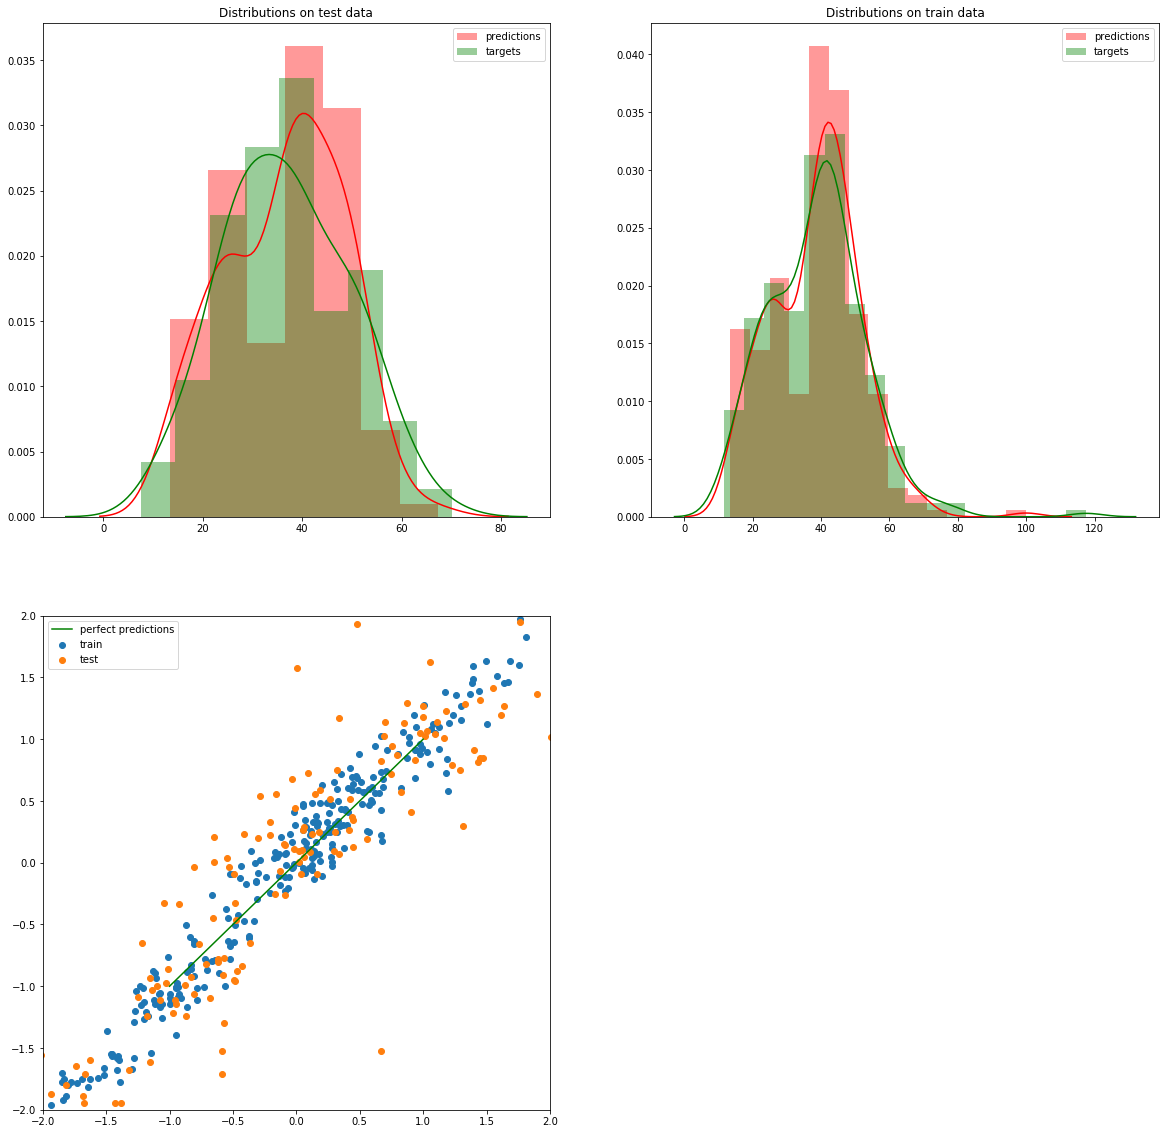

R2 score  0.8238611068443178
R2 score  0.6370794391782981
R2 score  -0.29235762590300896
R2 score  0.6685057523245308
R2 score  0.7796434038814548
R2 score  0.5598425978182929
R2 score  0.5538325675729814
R2 score  0.6093717800883695
R2 score  0.6422040183736337
R2 score  0.6616910305694406
Cross Validation Score:  0.5643674070748311


In [528]:
from sklearn.ensemble import GradientBoostingRegressor

boostreg = GradientBoostingRegressor()
x_df =  pd.read_csv("engineered.csv")
y_df = target_df

x_train, x_test, y_train, y_test = train_test_split(x_df.values,
                                                    y_df.values, 
                                                    test_size=0.33, 
                                                    random_state=42)

boostreg.fit(x_train, y_train)
predictions_train = boostreg.predict(x_train)
predictions_test = boostreg.predict(x_test)
targets_train = y_train
targets_test = y_test

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,20))
sns.distplot(predictions_test, color="r", label="predictions", ax=ax[0][0])
sns.distplot(targets_test, color="g", label="targets", ax=ax[0][0])
ax[0][0].legend()
ax[0][0].set_title("Distributions on test data")

sns.distplot(predictions_train, color="r", label="predictions", ax=ax[0][1])
sns.distplot(targets_train, color="g", label="targets", ax=ax[0][1])
ax[0][1].legend()
ax[0][1].set_title("Distributions on train data")

ax[1][0].scatter(z_score_normalize(targets_train), z_score_normalize(predictions_train), label = 'train')
ax[1][0].scatter(z_score_normalize(targets_test), z_score_normalize(predictions_test), label = 'test')
ax[1][0].plot(np.linspace(-1,1, num=140), np.linspace(-1, 1, num=140), label='perfect predictions', c="green")
ax[1][0].set_xlim((-2,2))
ax[1][0].set_ylim((-2,2))
ax[1][0].legend()

ax[1][1].axis('off')
plt.show()

from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

y_df = target_df
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
scores= []
    
for train_idx, test_idx in kf.split(x_df.values, y_df.values):
    x_train = x_df.loc[train_idx]
    y_train = y_df.loc[train_idx]
    x_test = x_df.loc[test_idx]
    y_test = y_df.loc[test_idx]
    boostreg = GradientBoostingRegressor()
    boostreg.fit(x_train, y_train)
    predictions_test = boostreg.predict(x_test)
    score = r2_score(predictions_test, y_test)
    scores.append(score)
    print("R2 score ", score)
    
print("Cross Validation Score: ", np.mean(scores))

## 5j. Support Vector Regressor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


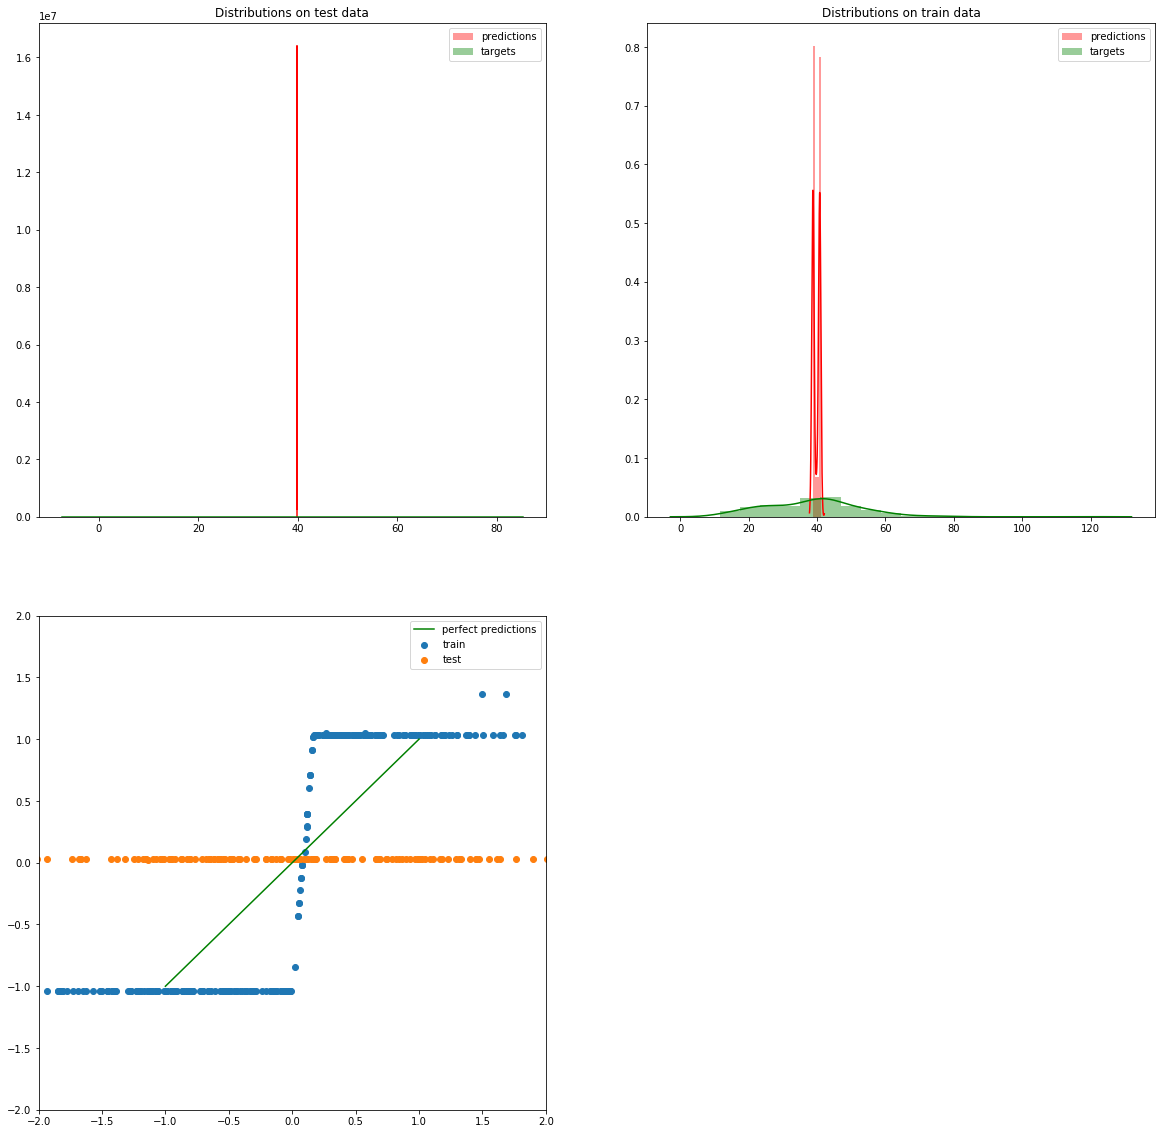

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


R2 score  -36188518.04547279


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


R2 score  0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


R2 score  -72801036.20510177


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


R2 score  -6.108817512067357e+19


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


R2 score  -7.185075222520725e+16


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


R2 score  -67123.70315655445


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


R2 score  -4.332017389038086e+21


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


R2 score  -68417.40197136502


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


R2 score  -556510053129399.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


R2 score  -840716408473120.4
Cross Validation Score:  -4.3931788121375546e+20


In [529]:
from sklearn.svm import SVR

svr = SVR()
x_df =  pd.read_csv("engineered.csv")
y_df = target_df

x_train, x_test, y_train, y_test = train_test_split(x_df.values,
                                                    y_df.values, 
                                                    test_size=0.33, 
                                                    random_state=42)

svr.fit(x_train, y_train)
predictions_train = svr.predict(x_train)
predictions_test = svr.predict(x_test)
targets_train = y_train
targets_test = y_test

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,20))
sns.distplot(predictions_test, color="r", label="predictions", ax=ax[0][0])
sns.distplot(targets_test, color="g", label="targets", ax=ax[0][0])
ax[0][0].legend()
ax[0][0].set_title("Distributions on test data")

sns.distplot(predictions_train, color="r", label="predictions", ax=ax[0][1])
sns.distplot(targets_train, color="g", label="targets", ax=ax[0][1])
ax[0][1].legend()
ax[0][1].set_title("Distributions on train data")

ax[1][0].scatter(z_score_normalize(targets_train), z_score_normalize(predictions_train), label = 'train')
ax[1][0].scatter(z_score_normalize(targets_test), z_score_normalize(predictions_test), label = 'test')
ax[1][0].plot(np.linspace(-1,1, num=140), np.linspace(-1, 1, num=140), label='perfect predictions', c="green")
ax[1][0].set_xlim((-2,2))
ax[1][0].set_ylim((-2,2))
ax[1][0].legend()

ax[1][1].axis('off')
plt.show()

from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

y_df = target_df
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
scores= []
    
for train_idx, test_idx in kf.split(x_df.values, y_df.values):
    x_train = x_df.loc[train_idx]
    y_train = y_df.loc[train_idx]
    x_test = x_df.loc[test_idx]
    y_test = y_df.loc[test_idx]
    svr = SVR()
    svr.fit(x_train, y_train)
    predictions_test = svr.predict(x_test)
    score = r2_score(predictions_test, y_test)
    scores.append(score)
    print("R2 score ", score)
    
print("Cross Validation Score: ", np.mean(scores))

## 5k. Evaluate all their performances


In [530]:
from sklearn.ensemble import VotingRegressor
import re

x_df =  pd.read_csv("engineered.csv")
y_df = target_df

estimators = {}
model_scores = {}

for i, model in enumerate([
        sklearn.linear_model.LinearRegression(),
        sklearn.linear_model.ARDRegression(),
        sklearn.linear_model.HuberRegressor(),
        sklearn.linear_model.PassiveAggressiveRegressor(),
        sklearn.linear_model.SGDRegressor(),
        sklearn.linear_model.RANSACRegressor(),
        sklearn.linear_model.TheilSenRegressor(),
        sklearn.dummy.DummyRegressor(),
        sklearn.ensemble.AdaBoostRegressor(),
        sklearn.ensemble.BaggingRegressor(),
        sklearn.ensemble.GradientBoostingRegressor(),
        sklearn.ensemble.RandomForestRegressor(),
        sklearn.neural_network.MLPRegressor(),
        sklearn.tree.DecisionTreeRegressor(),
        sklearn.svm.LinearSVR(),
        sklearn.svm.SVR()
         ]):
    estimators["model_{}".format(i)] = model
    
i = 0
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for k, model in estimators.items():
    scores= []
#     print(str(model))
    for train_idx, test_idx in kf.split(x_df.values, y_df.values):
        x_train = x_df.loc[train_idx]
        y_train = y_df.loc[train_idx]
        x_test = x_df.loc[test_idx]
        y_test = y_df.loc[test_idx]
        mdl = model
        mdl.fit(x_train, y_train)
        predictions_test = mdl.predict(x_test)
        score = r2_score(predictions_test, y_test)
        scores.append(score)
        i += 1
    final_score = np.mean(scores)
    model_scores[k] = final_score
model_scores = sorted(model_scores.items(), key=lambda x:x[1], reverse=True)

for k, v in model_scores[:3]:
    print(estimators[k])
    
# voting = VotingRegressor(list(estimators.items()))
# voting.fit(x_train, y_train)
# predictions_train = voting.predict(x_train)
# predictions_test = voting.predict(x_test)
# targets_train = y_train
# targets_test = y_test

# fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,20))
# sns.distplot(predictions_test, color="r", label="predictions", ax=ax[0][0])
# sns.distplot(targets_test, color="g", label="targets", ax=ax[0][0])
# ax[0][0].legend()
# ax[0][0].set_title("Distributions on test data")

# sns.distplot(predictions_train, color="r", label="predictions", ax=ax[0][1])
# sns.distplot(targets_train, color="g", label="targets", ax=ax[0][1])
# ax[0][1].legend()
# ax[0][1].set_title("Distributions on train data")

# ax[1][0].scatter(z_score_normalize(targets_train), z_score_normalize(predictions_train), label = 'train')
# ax[1][0].scatter(z_score_normalize(targets_test), z_score_normalize(predictions_test), label = 'test')
# ax[1][0].plot(np.linspace(-1,1, num=140), np.linspace(-1, 1, num=140), label='perfect predictions', c="green")
# ax[1][0].set_xlim((-2,2))
# ax[1][0].set_ylim((-2,2))
# ax[1][0].legend()

# ax[1][1].axis('off')
# plt.show()

# from sklearn.model_selection import KFold
# from sklearn.metrics import r2_score

# y_df = target_df
# kfold = KFold(n_splits=3, shuffle=True, random_state=42)
# scores= []
    
# for train_idx, test_idx in kf.split(x_df.values, y_df.values):
#     x_train = x_df.loc[train_idx]
#     y_train = y_df.loc[train_idx]
#     x_test = x_df.loc[test_idx]
#     y_test = y_df.loc[test_idx]
#     svr = SVR()
#     svr.fit(x_train, y_train)
#     predictions_test = svr.predict(x_test)
#     score = r2_score(predictions_test, y_test)
#     scores.append(score)
#     print("R2 score ", score)
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Program

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      m

In [532]:
import re
for k, v in model_scores[:3]:
    print(re.findall(r"([\W\w\d\D]+)\(", str(estimators[k])), k,  v)
print(type(sklearn.svm.LinearSVR()))

['GradientBoostingRegressor'] model_10 0.5674806037211402
['BaggingRegressor'] model_9 0.5598619108832159
['RandomForestRegressor'] model_11 0.5310532082911983
<class 'sklearn.svm.classes.LinearSVR'>


By cross-validating all regression models on our engineered features, we have arrived at the models with the best goodness of fit. Now, we will explore optimizing the top three models through hyperparameter search.

# 6. Hyperparameter Search

In [489]:
import inspect

top3 = [estimators[k] for k in dict(model_scores[:3]).keys()]
print(*top3, sep="\n")

learning_rates = np.linspace(0.1,1,20)
alpha = np.linspace(0.1,1,20)
max_depths = list(range(1,11))
n_estimators = np.linspace(10,200,20)
max_samples = np.linspace(1,10,)
print(max_depths)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
              